In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import chi2
from sklearn.covariance import MinCovDet
from sklearn.ensemble import IsolationForest

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/ML 2/Dermatology/dermatology_database_1.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(file_path)
df.head()

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0         2        2                 0        3                   0   
1         3        3                 3        2                   1   
2         2        1                 2        3                   1   
3         2        2                 2        0                   0   
4         2        3                 2        2                   2   

   polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                  0                   0                         0   
1                  0                   0                         0   
2                  3                   0                         3   
3                  0                   0                         0   
4                  2                   0                         2   

   knee_and_elbow_involvement  scalp_involvement  ...  \
0                           1                  0  ...   
1                           1                  1  ...   
2                           0                  0  ...   
3                           3                  2  ...   
4                           0                  0  ...   

   disappearance_granular_layer  vacuolisation_damage_basal_layer  spongiosis  \
0                             0                                 0           3   
1                             0                                 0           0   
2                             0                                 2           3   
3                             3                                 0           0   
4                             2                                 3           2   

   saw_tooth_appearance_retes  follicular_horn_plug  \
0                           0                     0   
1                           0                     0   
2                           2                     0   
3                           0                     0   
4                           3                     0   

   perifollicular_parakeratosis  inflammatory_mononuclear_infiltrate  \
0                             0                                    1   
1                             0                                    1   
2                             0                                    2   
3                             0                                    3   
4                             0                                    2   

   band_like_infiltrate  age  class  
0                     0   55      2  
1                     0    8      1  
2                     3   26      3  
3                     0   40      1  
4                     3   45      3  

[5 rows x 35 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   erythema                             366 non-null    int64 
 1   scaling                              366 non-null    int64 
 2   definite_borders                     366 non-null    int64 
 3   itching                              366 non-null    int64 
 4   koebner_phenomenon                   366 non-null    int64 
 5   polygonal_papules                    366 non-null    int64 
 6   follicular_papules                   366 non-null    int64 
 7   oral_mucosal_involvement             366 non-null    int64 
 8   knee_and_elbow_involvement           366 non-null    int64 
 9   scalp_involvement                    366 non-null    int64 
 10  family_history                       366 non-null    int64 
 11  melanin_incontinence                 366 non-

In [ ]:
df.isna().sum()

erythema                               0
scaling                                0
definite_borders                       0
itching                                0
koebner_phenomenon                     0
polygonal_papules                      0
follicular_papules                     0
oral_mucosal_involvement               0
knee_and_elbow_involvement             0
scalp_involvement                      0
family_history                         0
melanin_incontinence                   0
eosinophils_infiltrate                 0
PNL_infiltrate                         0
fibrosis_papillary_dermis              0
exocytosis                             0
acanthosis                             0
hyperkeratosis                         0
parakeratosis                          0
clubbing_rete_ridges                   0
elongation_rete_ridges                 0
thinning_suprapapillary_epidermis      0
spongiform_pustule                     0
munro_microabcess                      0
focal_hypergranulosis                  0
disappearance_granular_layer           0
vacuolisation_damage_basal_layer       0
spongiosis                             0
saw_tooth_appearance_retes             0
follicular_horn_plug                   0
perifollicular_parakeratosis           0
inflammatory_mononuclear_infiltrate    0
band_like_infiltrate                   0
age                                    0
class                                  0
dtype: int64

In [ ]:
# Function to count question marks in each column
def count_question_marks(column):
    return column.apply(lambda x: str(x).count('?')).sum()

# Applying the function to each column
question_marks_count = df.apply(count_question_marks)

print(question_marks_count)

erythema                               0
scaling                                0
definite_borders                       0
itching                                0
koebner_phenomenon                     0
polygonal_papules                      0
follicular_papules                     0
oral_mucosal_involvement               0
knee_and_elbow_involvement             0
scalp_involvement                      0
family_history                         0
melanin_incontinence                   0
eosinophils_infiltrate                 0
PNL_infiltrate                         0
fibrosis_papillary_dermis              0
exocytosis                             0
acanthosis                             0
hyperkeratosis                         0
parakeratosis                          0
clubbing_rete_ridges                   0
elongation_rete_ridges                 0
thinning_suprapapillary_epidermis      0
spongiform_pustule                     0
munro_microabcess                      0
focal_hypergranu

In [ ]:
# Replace question marks with NaN in the 'age' column
df['age'] = df['age'].replace('?', np.nan).astype(float)

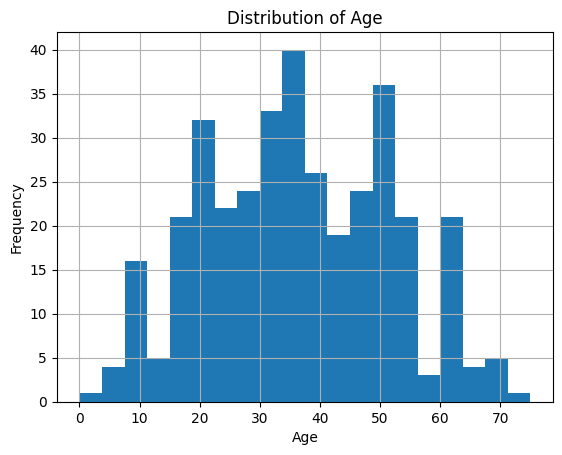

Skewness of age: 0.07335210626078169


In [ ]:
import matplotlib.pyplot as plt

# Plot the distribution of the 'age' column
df['age'].hist(bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Check the skewness of the 'age' column
skewness = df['age'].skew()
print(f'Skewness of age: {skewness}')


Since abs(skewness) < 0.5, the data is approximately normally distributed, so use the mean to impute

In [ ]:
if abs(skewness) < 0.5:
    # Replace NaN with mean
    df['age'].fillna(df['age'].mean(), inplace=True)
else:
    # Replace NaN with median
    df['age'].fillna(df['age'].median(), inplace=True)


In [ ]:
print(df['age'].isnull().sum())
print(df['age'].head())

0
0    55.0
1     8.0
2    26.0
3    40.0
4    45.0
Name: age, dtype: float64


In [ ]:
df.dtypes

erythema                                 int64
scaling                                  int64
definite_borders                         int64
itching                                  int64
koebner_phenomenon                       int64
polygonal_papules                        int64
follicular_papules                       int64
oral_mucosal_involvement                 int64
knee_and_elbow_involvement               int64
scalp_involvement                        int64
family_history                           int64
melanin_incontinence                     int64
eosinophils_infiltrate                   int64
PNL_infiltrate                           int64
fibrosis_papillary_dermis                int64
exocytosis                               int64
acanthosis                               int64
hyperkeratosis                           int64
parakeratosis                            int64
clubbing_rete_ridges                     int64
elongation_rete_ridges                   int64
thinning_suprapapillary_epidermis        int64
spongiform_pustule                       int64
munro_microabcess                        int64
focal_hypergranulosis                    int64
disappearance_granular_layer             int64
vacuolisation_damage_basal_layer         int64
spongiosis                               int64
saw_tooth_appearance_retes               int64
follicular_horn_plug                     int64
perifollicular_parakeratosis             int64
inflammatory_mononuclear_infiltrate      int64
band_like_infiltrate                     int64
age                                    float64
class                                    int64
dtype: object

In [ ]:
categorical_columns = [col for col in df.columns if col != 'age']

# Convert specified columns to categorical
df[categorical_columns] = df[categorical_columns].astype('category')

In [ ]:
df.dtypes

erythema                               category
scaling                                category
definite_borders                       category
itching                                category
koebner_phenomenon                     category
polygonal_papules                      category
follicular_papules                     category
oral_mucosal_involvement               category
knee_and_elbow_involvement             category
scalp_involvement                      category
family_history                         category
melanin_incontinence                   category
eosinophils_infiltrate                 category
PNL_infiltrate                         category
fibrosis_papillary_dermis              category
exocytosis                             category
acanthosis                             category
hyperkeratosis                         category
parakeratosis                          category
clubbing_rete_ridges                   category
elongation_rete_ridges                 category
thinning_suprapapillary_epidermis      category
spongiform_pustule                     category
munro_microabcess                      category
focal_hypergranulosis                  category
disappearance_granular_layer           category
vacuolisation_damage_basal_layer       category
spongiosis                             category
saw_tooth_appearance_retes             category
follicular_horn_plug                   category
perifollicular_parakeratosis           category
inflammatory_mononuclear_infiltrate    category
band_like_infiltrate                   category
age                                     float64
class                                  category
dtype: object

In [ ]:
df.shape

(366, 35)

In [ ]:
#Check for duplicates in the entire DataFrame
duplicate_rows = df[df.duplicated()]
num_duplicates = duplicate_rows.shape[0]

print(f"Number of duplicate rows found: {num_duplicates}")

Number of duplicate rows found: 0


In [ ]:
# Filter the DataFrame to get rows where class is 2
seborrheic_dermatitis_cases = df[df['class'] == 2]

# Find the unique values of koebner_phenomenon for these records
unique_koebner_values = seborrheic_dermatitis_cases['koebner_phenomenon'].unique()

# Display the unique koebner values
print("Unique koebner_phenomenon values for class 2 (seborrheic dermatitis):", unique_koebner_values)

Unique koebner_phenomenon values for class 2 (seborrheic dermatitis): [0, 2]
Categories (4, int64): [0, 1, 2, 3]


In [ ]:
# Count the number of records for each unique koebner_phenomenon value in these cases
koebner_value_counts = seborrheic_dermatitis_cases['koebner_phenomenon'].value_counts()

# Display the counts
print("Counts of each koebner_phenomenon value for class 2 (seborrheic dermatitis):")
print(koebner_value_counts)

Counts of each koebner_phenomenon value for class 2 (seborrheic dermatitis):
koebner_phenomenon
0    60
2     1
1     0
3     0
Name: count, dtype: int64


In [ ]:
# Group the dataset by 'class' and apply value_counts on 'clubbing_rete_ridges'
clubbing_value_counts_per_class = df.groupby('class')['clubbing_rete_ridges'].value_counts().unstack().fillna(0)

# Display the counts
print("Counts of each clubbing_rete_ridges value for each class:")
print(clubbing_value_counts_per_class)

Counts of each clubbing_rete_ridges value for each class:
clubbing_rete_ridges   0   1   2   3
class                               
1                      3  15  60  34
2                     61   0   0   0
3                     72   0   0   0
4                     49   0   0   0
5                     49   2   1   0
6                     18   2   0   0


Only 0 is possible as koebner_phenomenon is not a symptom of seborrheic dermatitis

In [ ]:
# Remove the record where class is 2 and koebner_phenomenon is 2
filtered_df = df[~((df['class'] == 2) & (df['koebner_phenomenon'] == 2))]

# Verify the record has been removed
print(filtered_df.shape)

(365, 35)


In [ ]:
#Features (all columns except the target column)
X = filtered_df.drop(columns=['class'])
#Target variable
y = filtered_df['class']

#Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Print the shapes of the resulting datasets to verify the split
print("Training set - Features shape:", X_train.shape, " Target shape:", y_train.shape)
print("Testing set - Features shape:", X_test.shape, " Target shape:", y_test.shape)

Training set - Features shape: (292, 34)  Target shape: (292,)
Testing set - Features shape: (73, 34)  Target shape: (73,)


EDA

In [ ]:
# Define color mapping
unique_classes = [1, 2, 3, 4, 5, 6]
colors = plt.get_cmap('tab10').colors  # Get colors from 'tab10' colormap

# Ensure there are enough colors for the number of classes
color_mapping = {cls: colors[i % len(colors)] for i, cls in enumerate(unique_classes)}

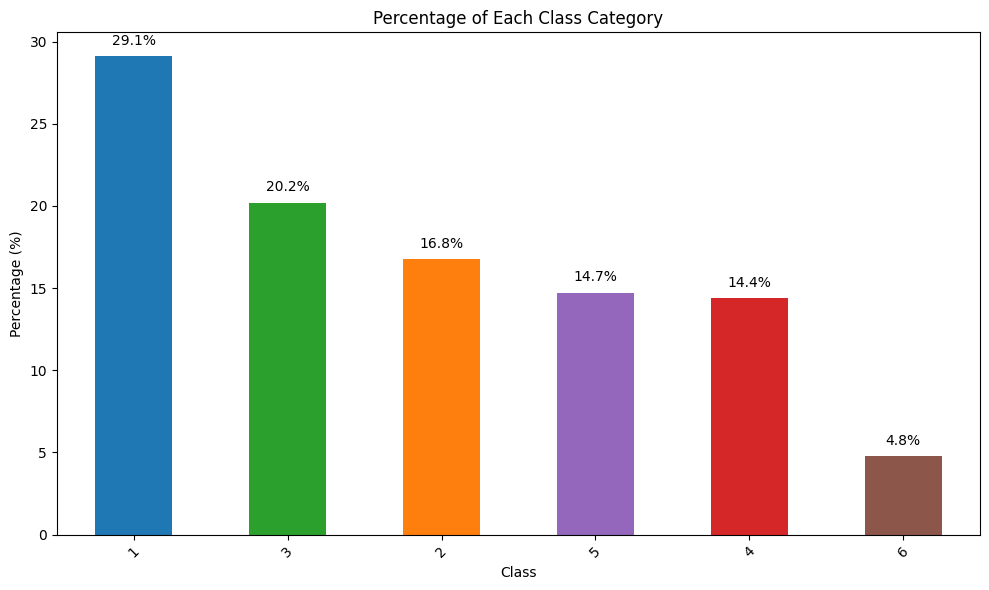

In [ ]:
# Calculate the value counts and convert to percentages
class_counts = y_train.value_counts(normalize=True) * 100

# Plotting the percentage bar chart with different colors
plt.figure(figsize=(10, 6))

# Plot the bar chart
bars = class_counts.plot(kind='bar', color=[color_mapping[cls] for cls in class_counts.index])

# Annotate each bar with its percentage value
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.1f}%', ha='center', va='bottom', fontsize=10)

plt.xlabel('Class')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Each Class Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Assuming y_train is a pandas Series with class labels
class_counts = y_train.value_counts()

# Print the counts for each class
print("Class Counts:")
print(class_counts)


Class Counts:
class
1    85
3    59
2    49
5    43
4    42
6    14
Name: count, dtype: int64


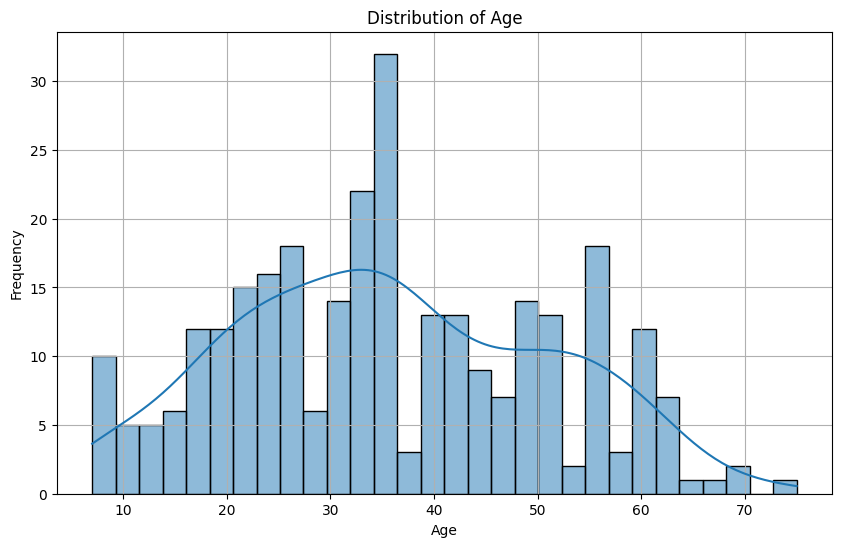

In [ ]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(X_train['age'], kde=True, bins=30)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.grid()
plt.show()

In [ ]:
# Summary statistics of 'age' in the training set
age_summary = X_train['age'].describe()
print(age_summary)

count    292.000000
mean      35.759509
std       15.005799
min        7.000000
25%       25.000000
50%       35.000000
75%       48.000000
max       75.000000
Name: age, dtype: float64


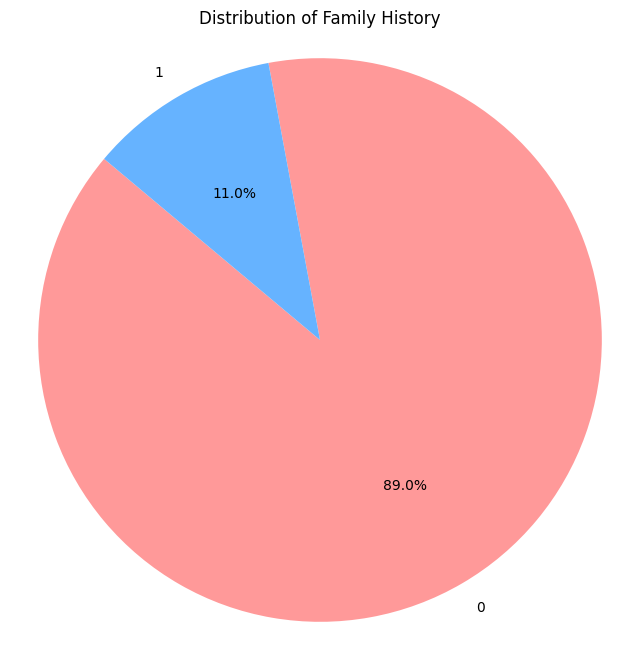

In [ ]:
# Plot the distribution of 'family_history' in the training set
family_history_counts = X_train['family_history'].value_counts()
labels = family_history_counts.index
sizes = family_history_counts.values
colors = ['#ff9999','#66b3ff']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Family History')
plt.axis('equal')
plt.show()

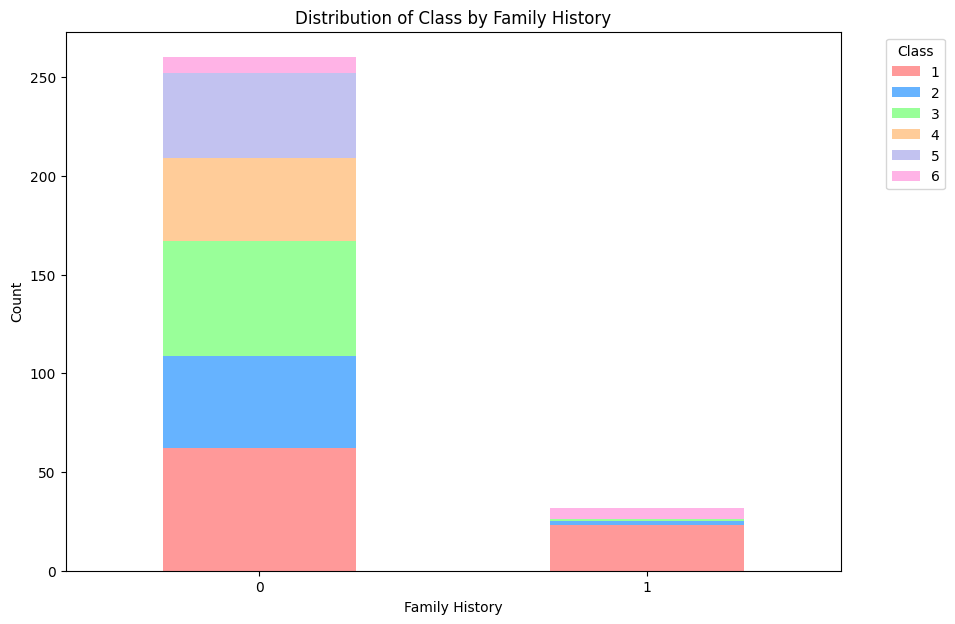

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.concat([X_train['family_history'], y_train], axis=1)

# Create a crosstab to count the occurrences of each combination of family_history and class
crosstab = pd.crosstab(df['family_history'], df['class'])

# Plot the stacked bar chart
crosstab.plot(kind='bar', stacked=True, color=['#ff9999','#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6'], figsize=(10, 7))

plt.title('Distribution of Class by Family History')
plt.xlabel('Family History')
plt.ylabel('Count')
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

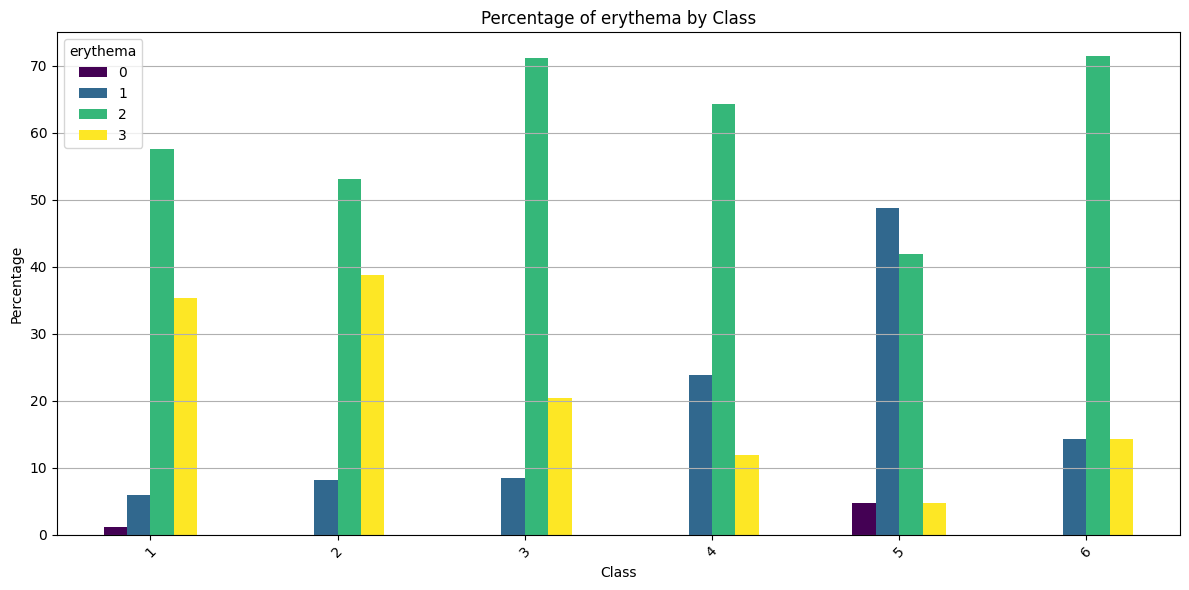

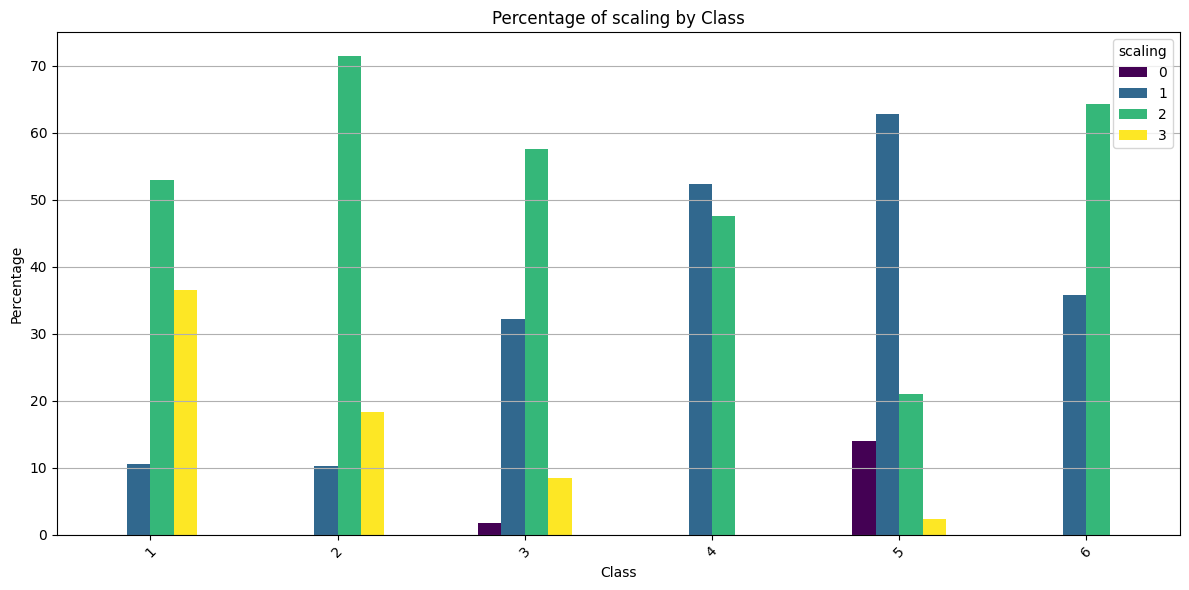

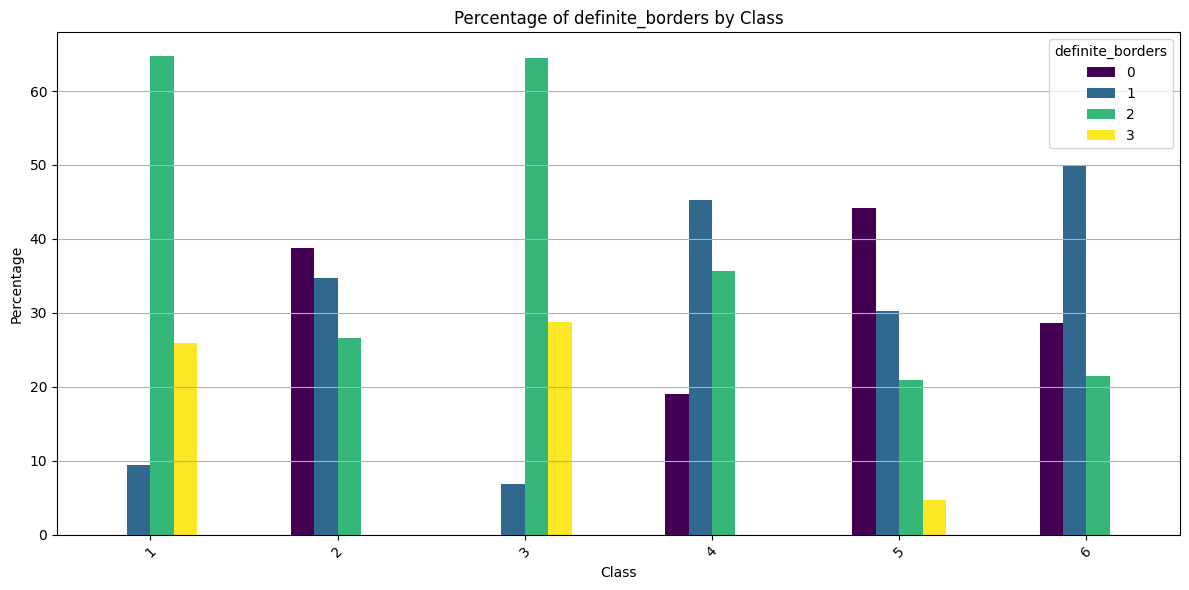

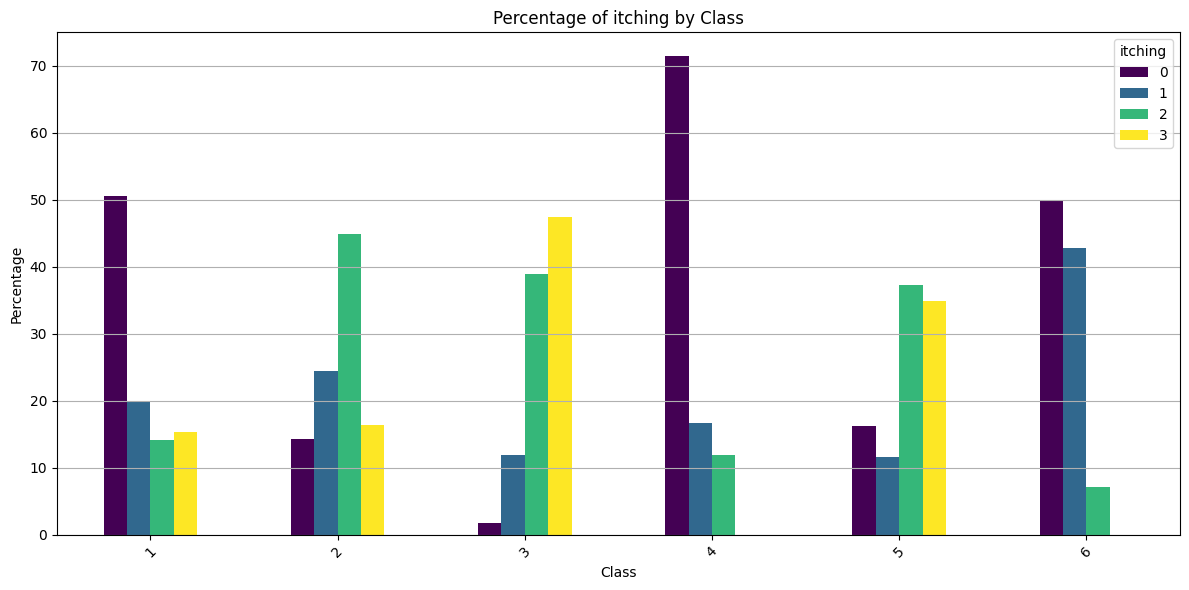

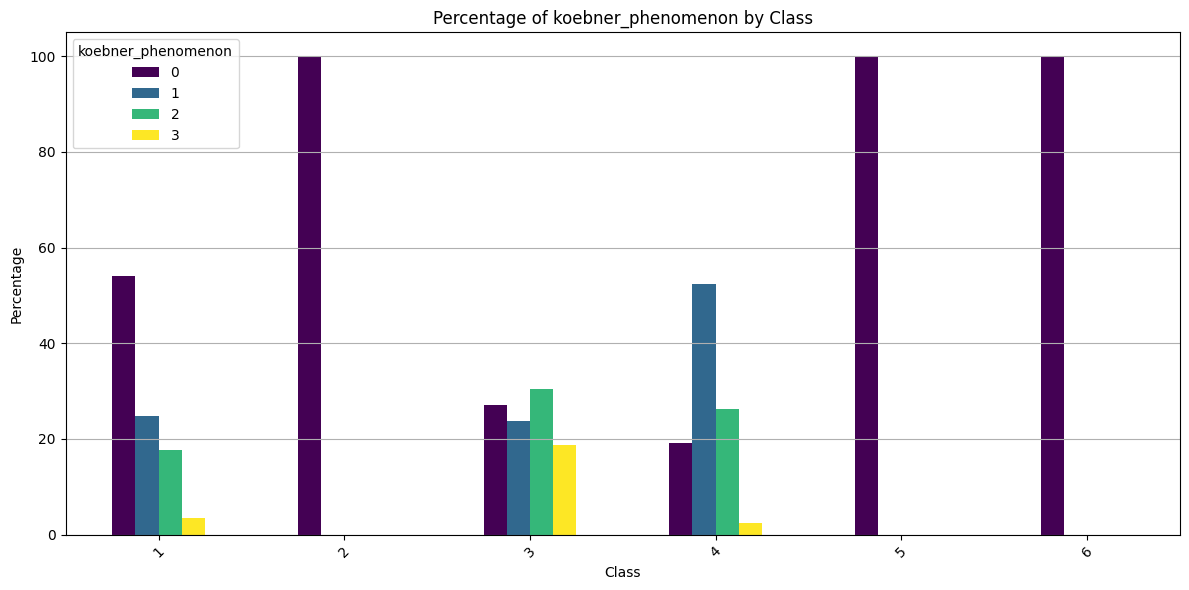

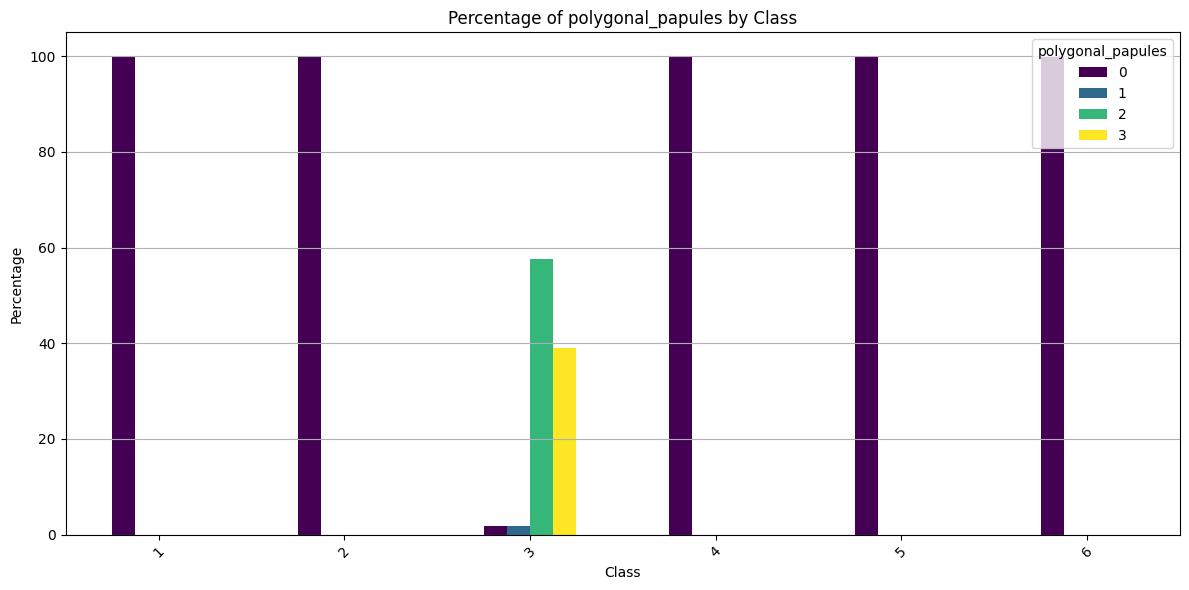

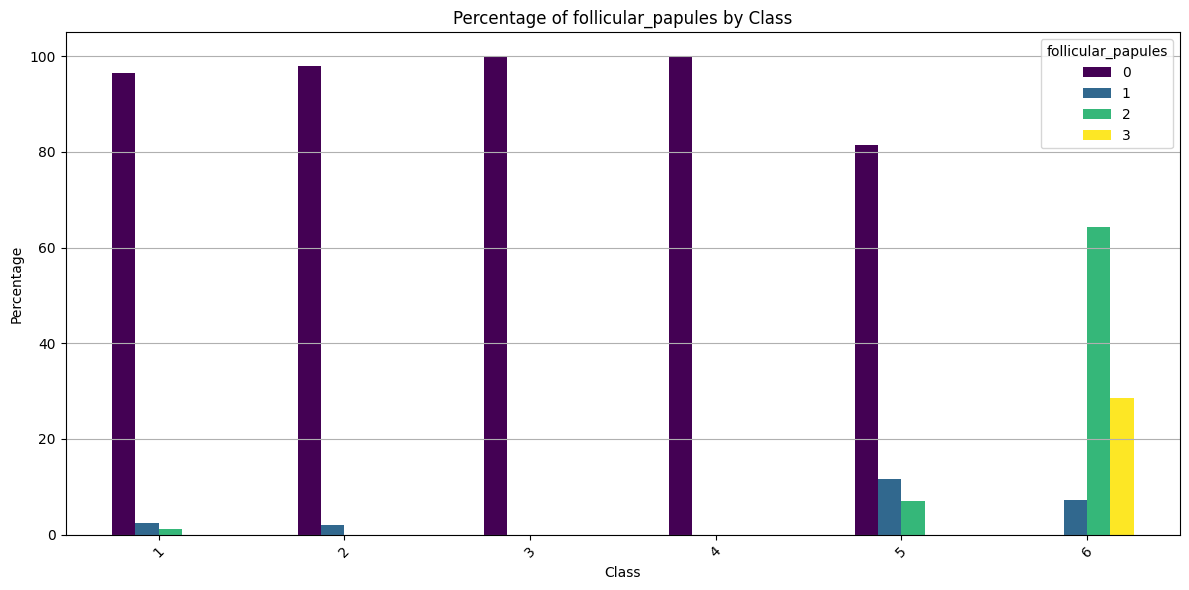

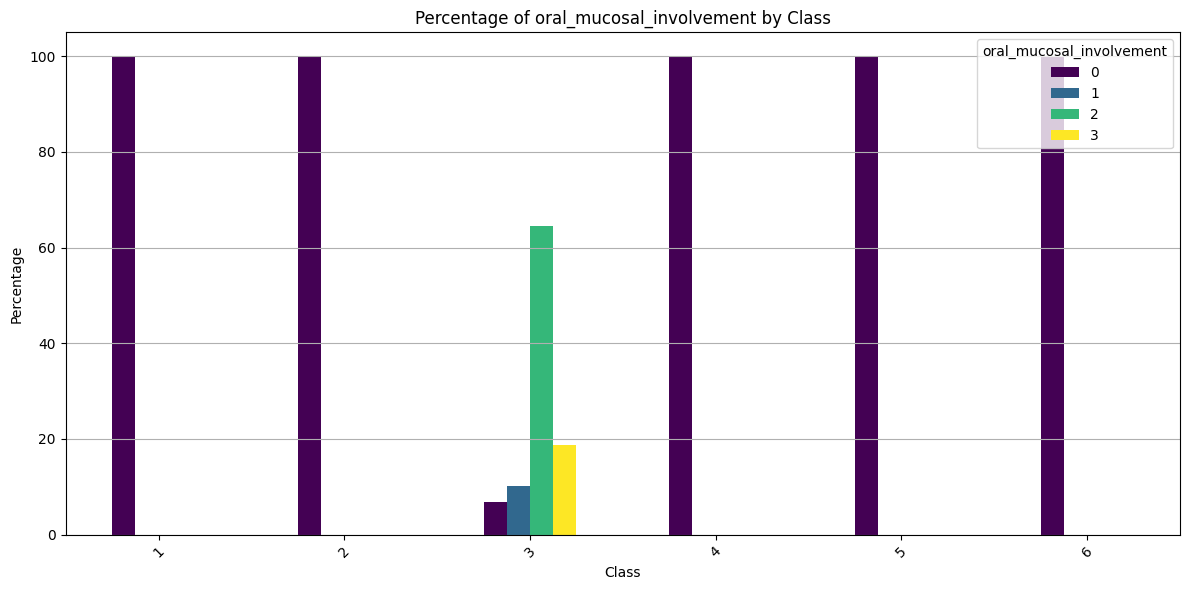

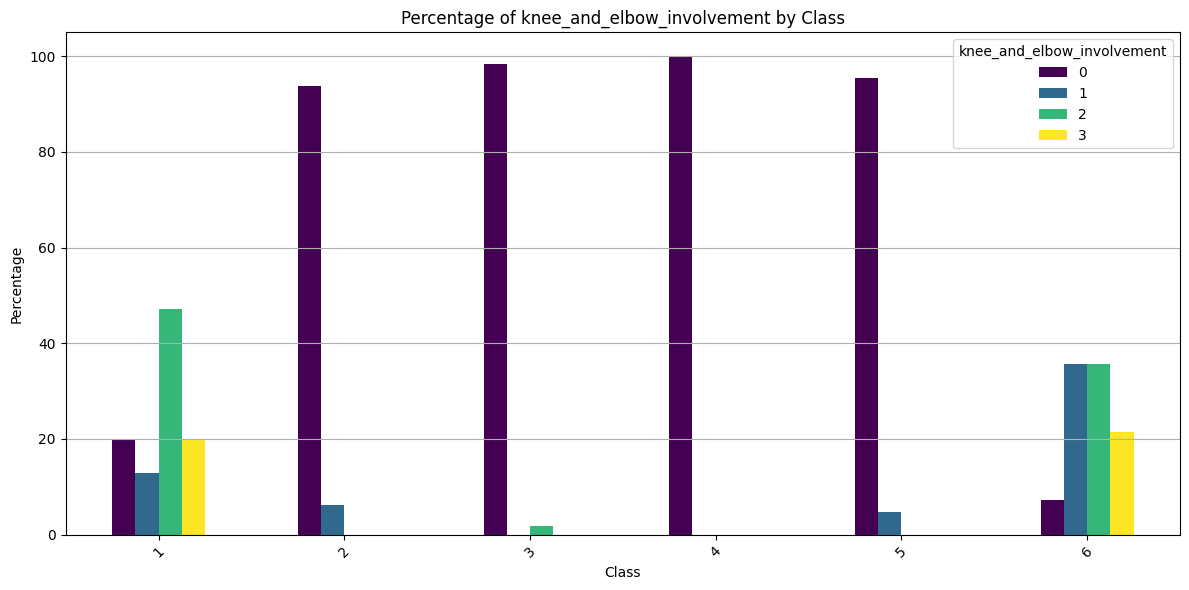

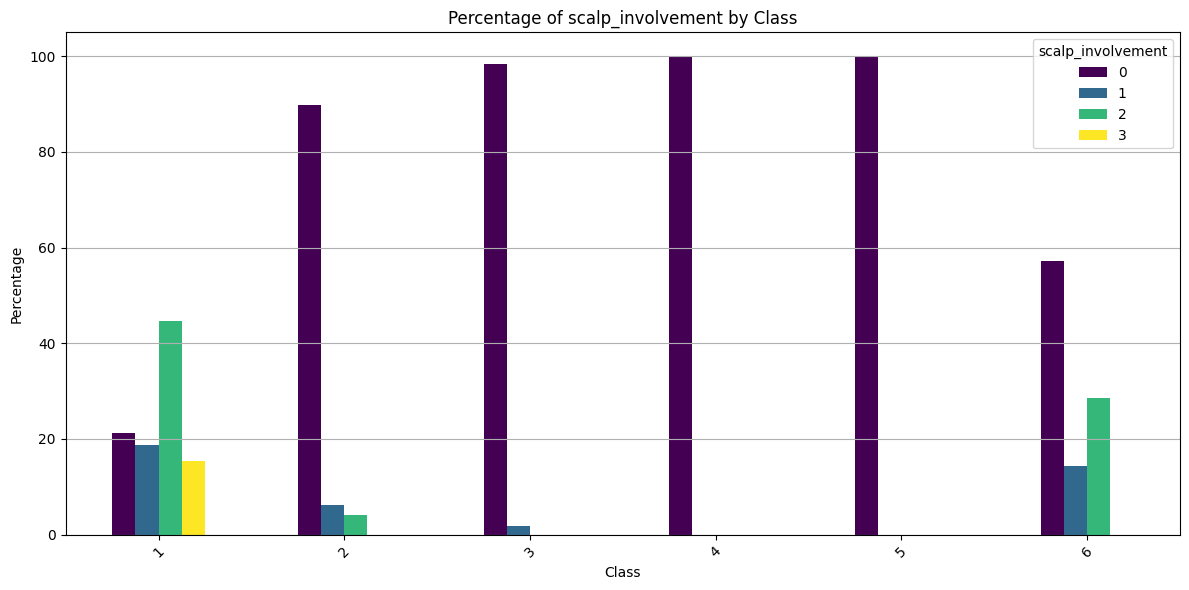

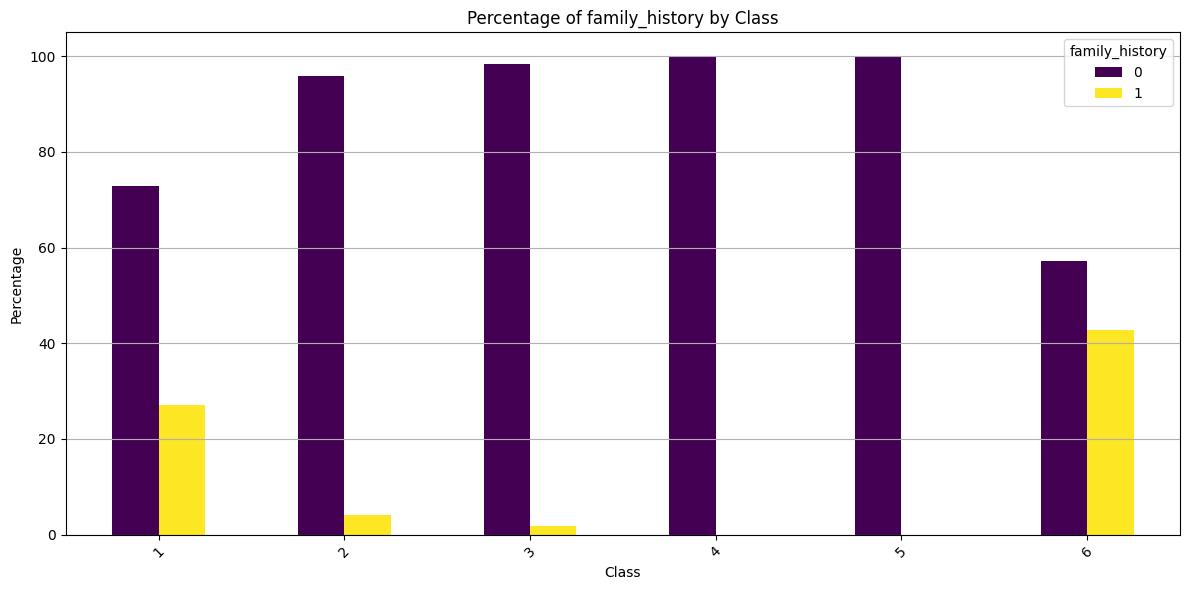

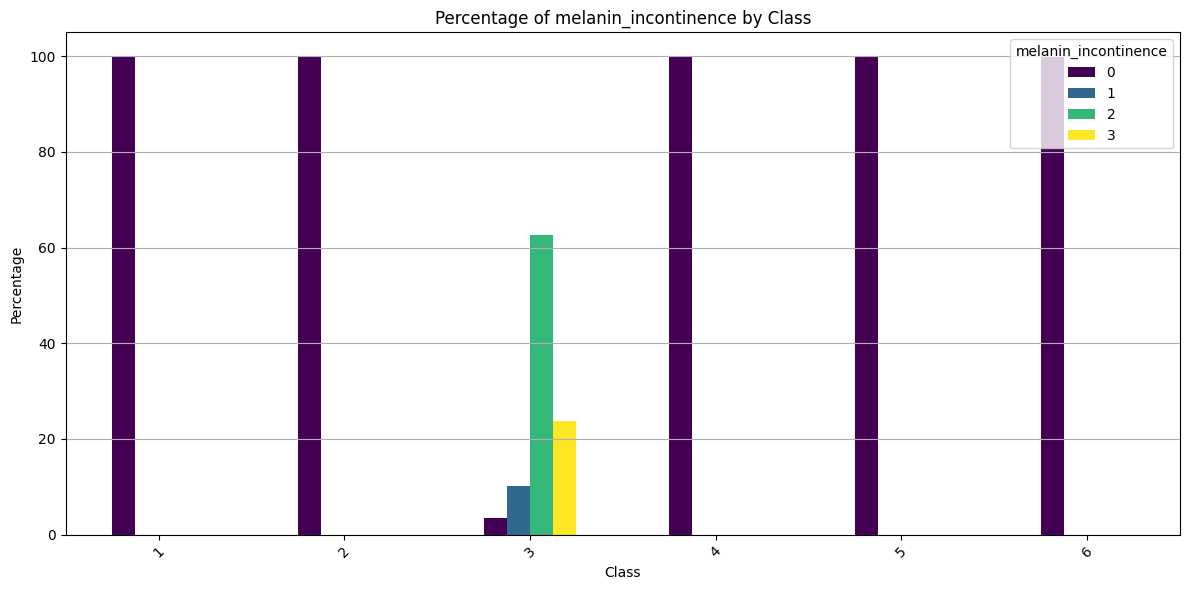

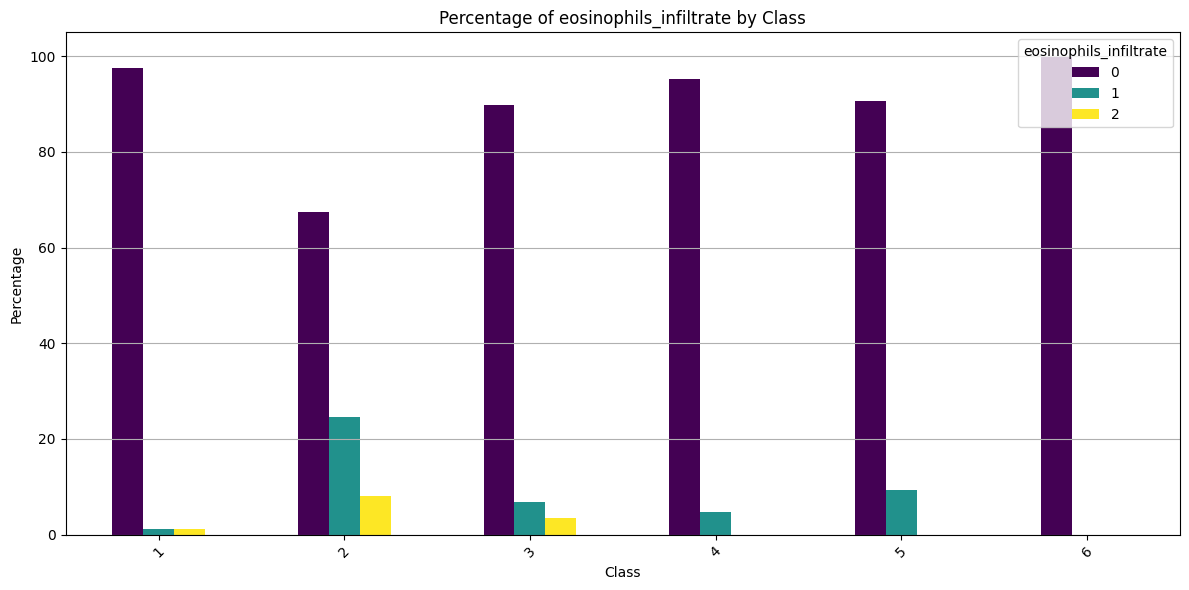

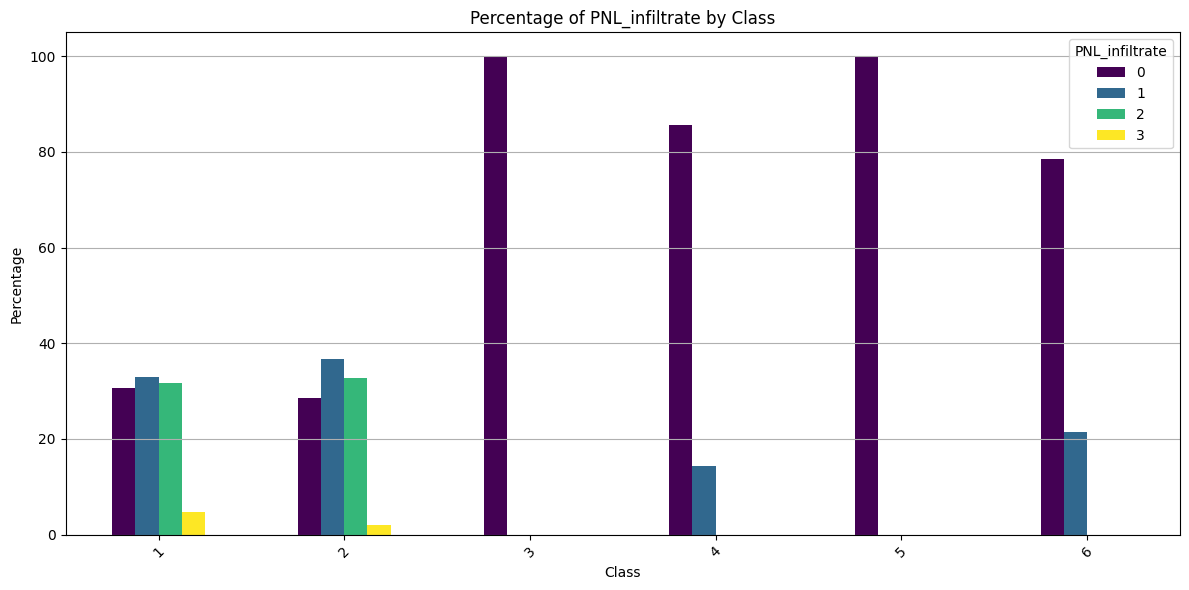

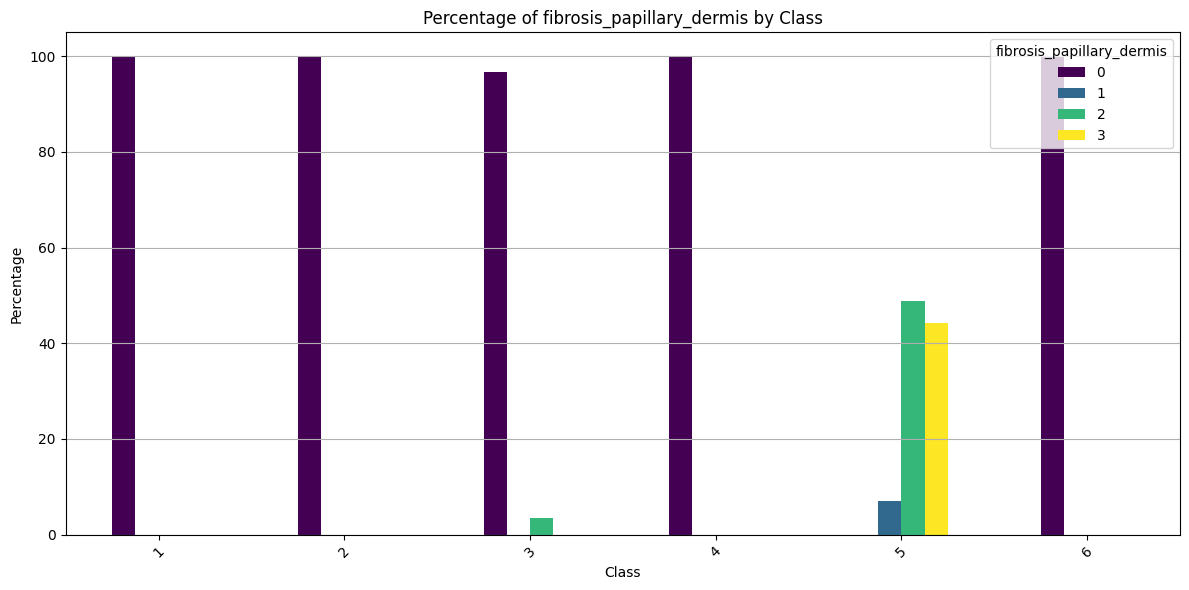

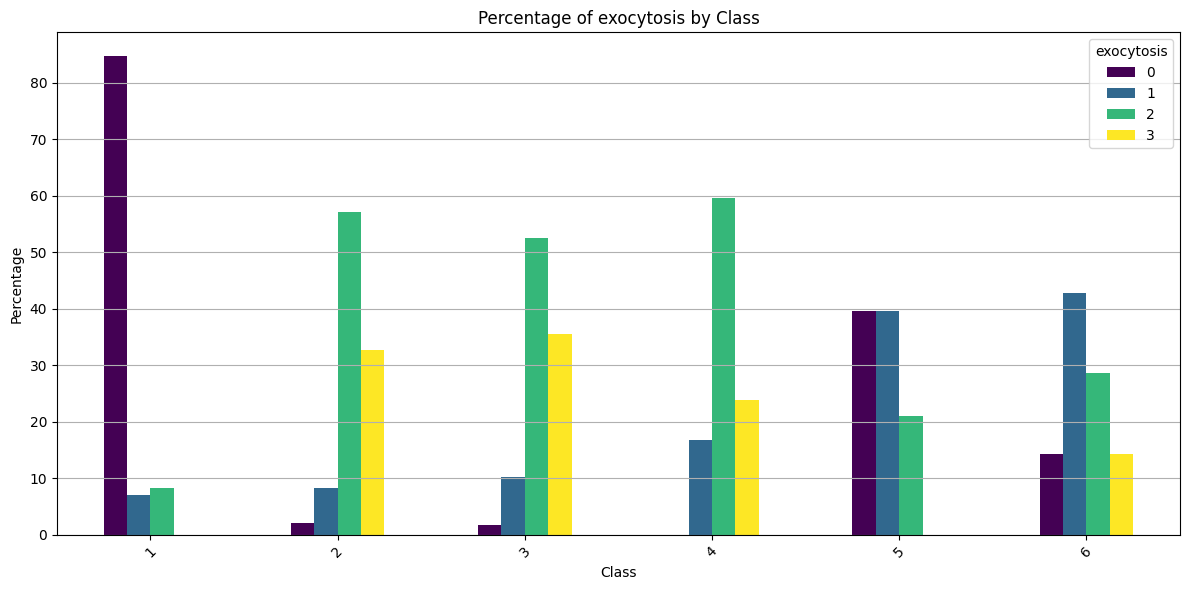

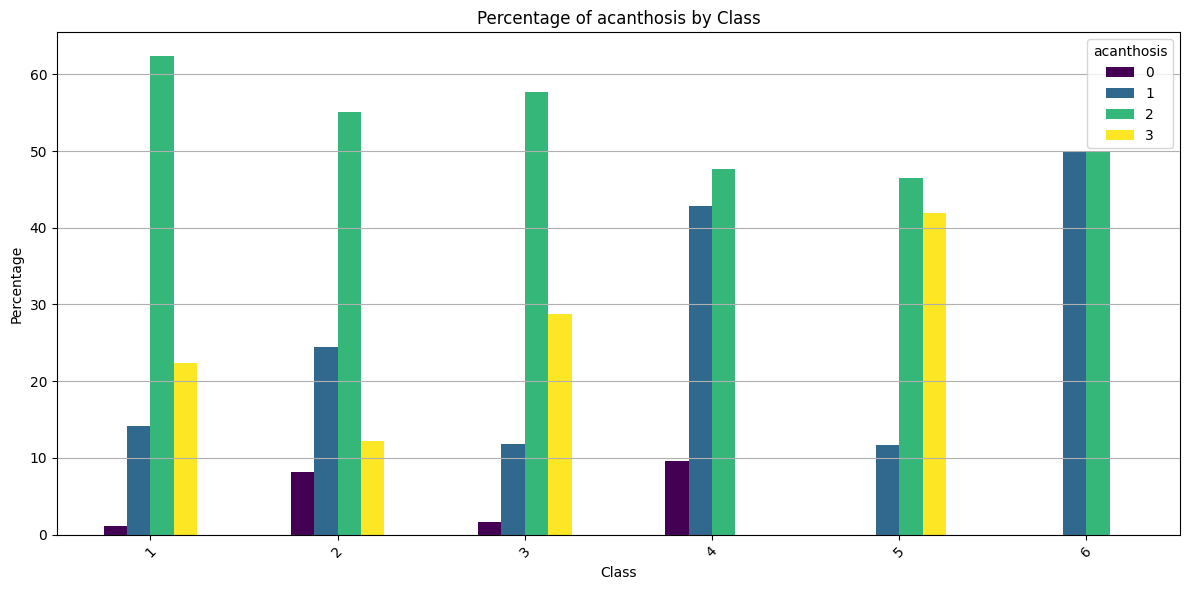

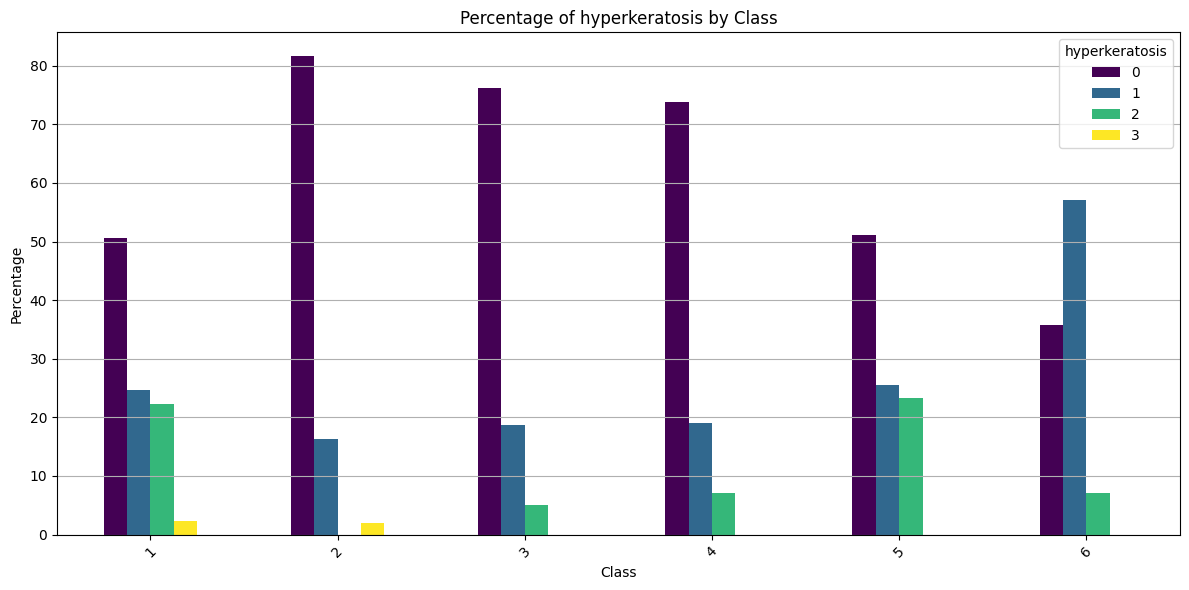

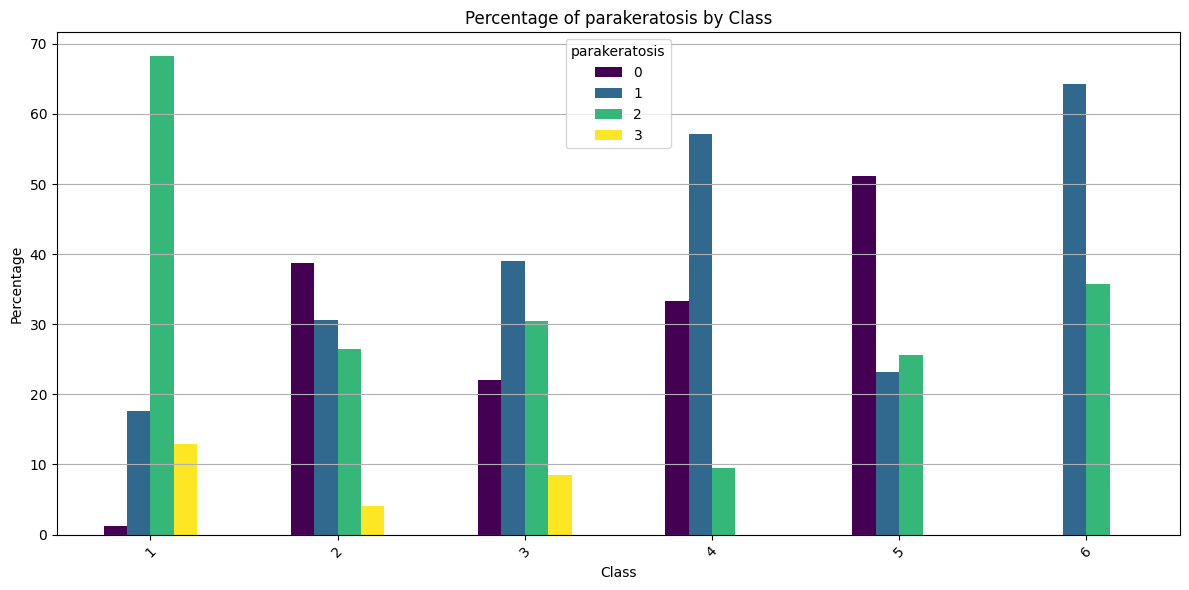

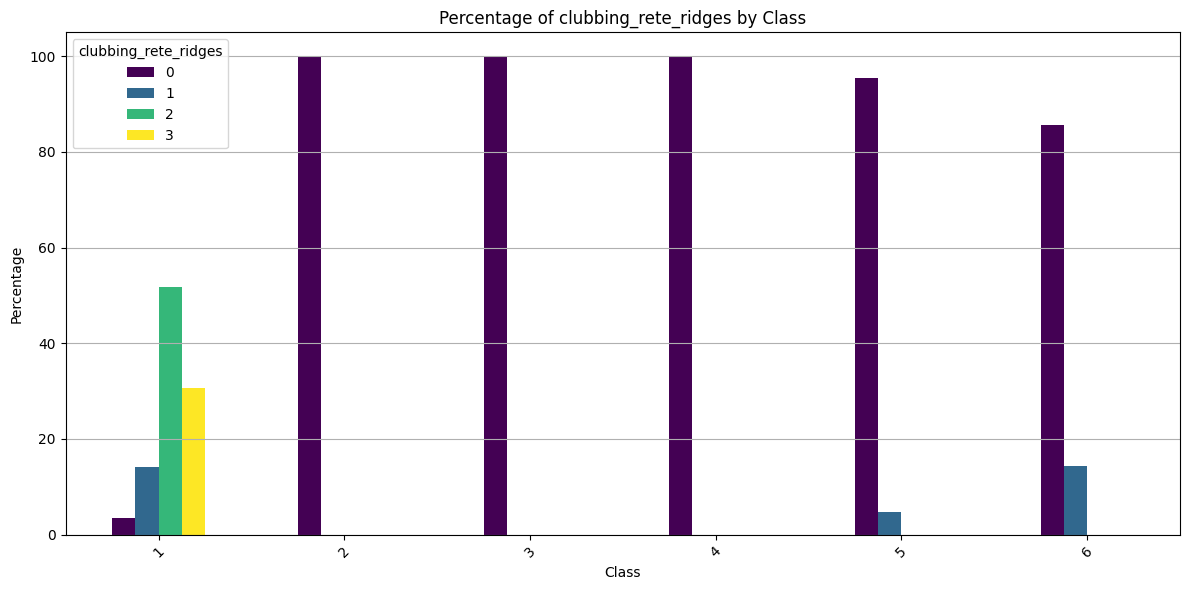

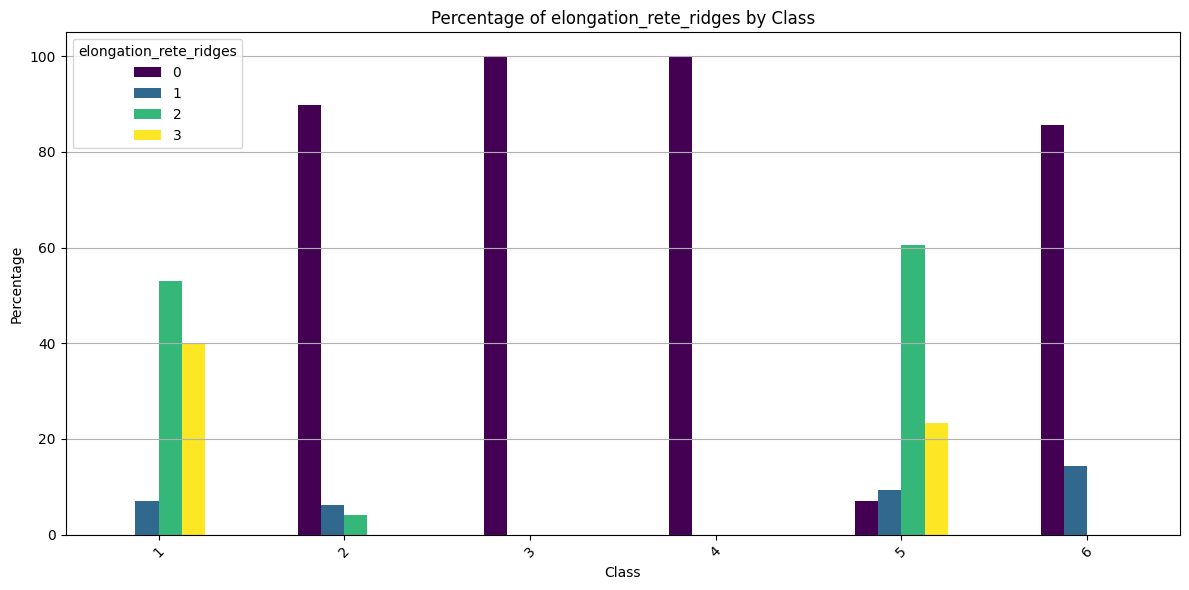

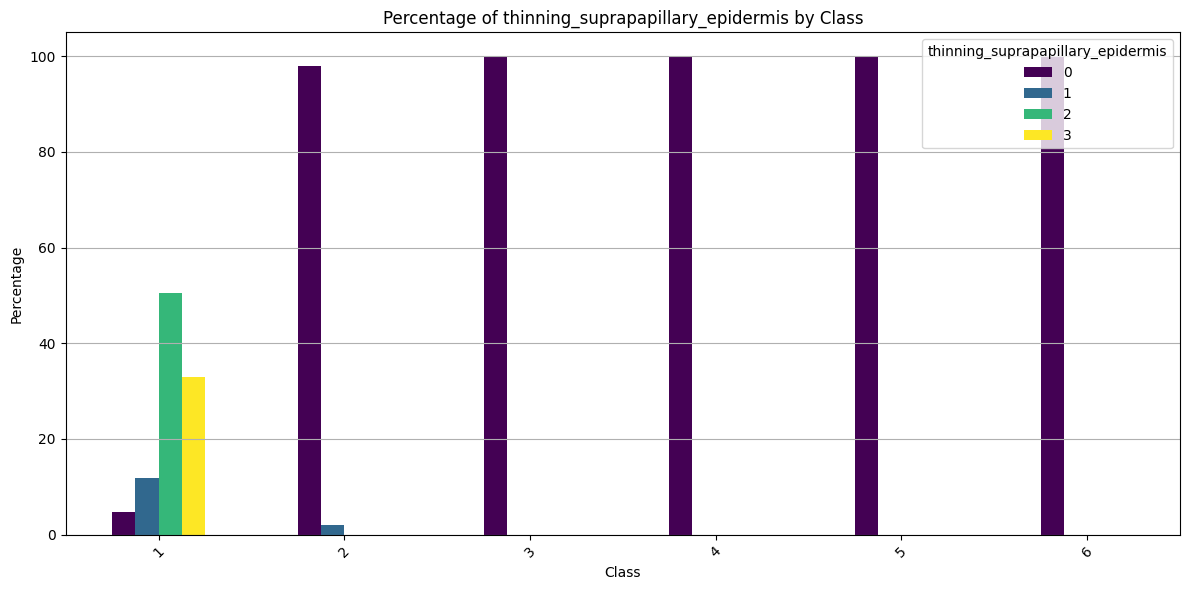

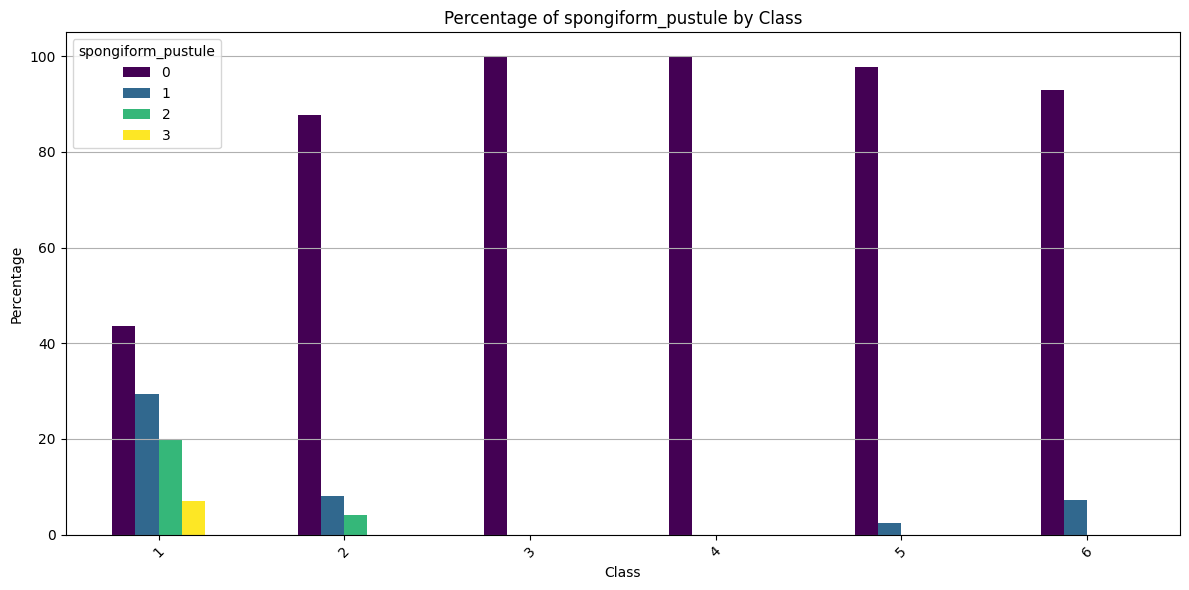

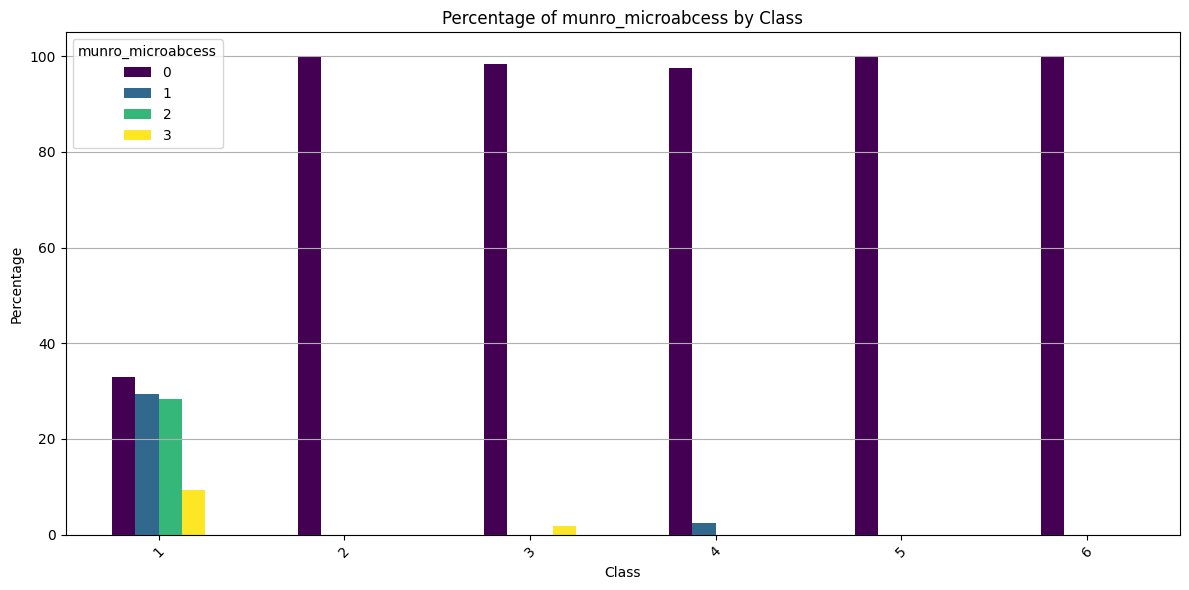

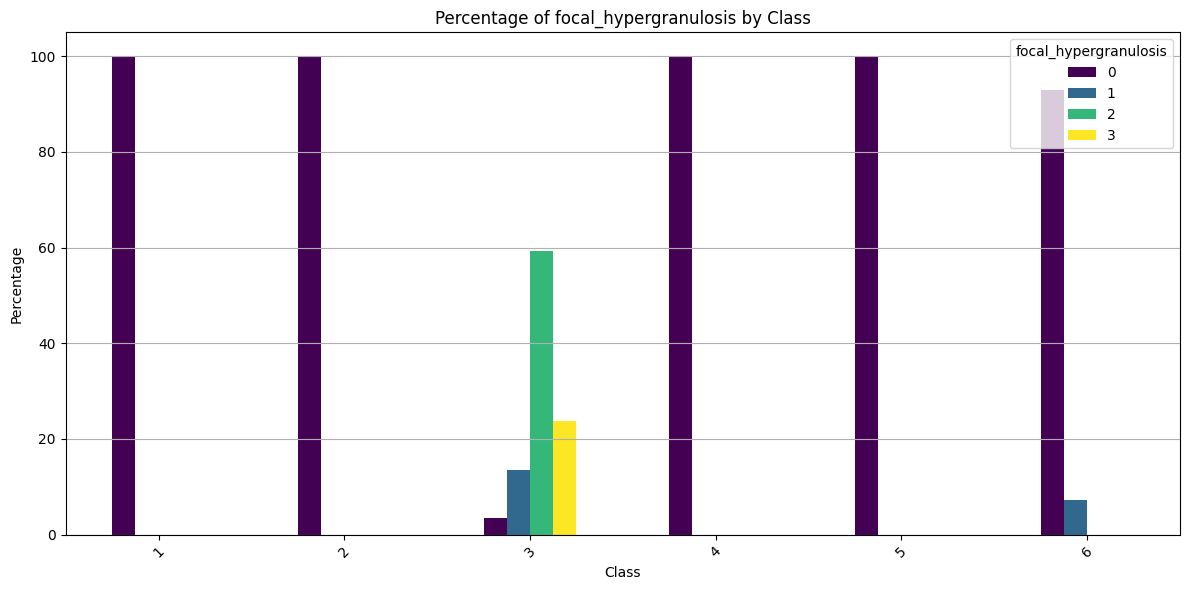

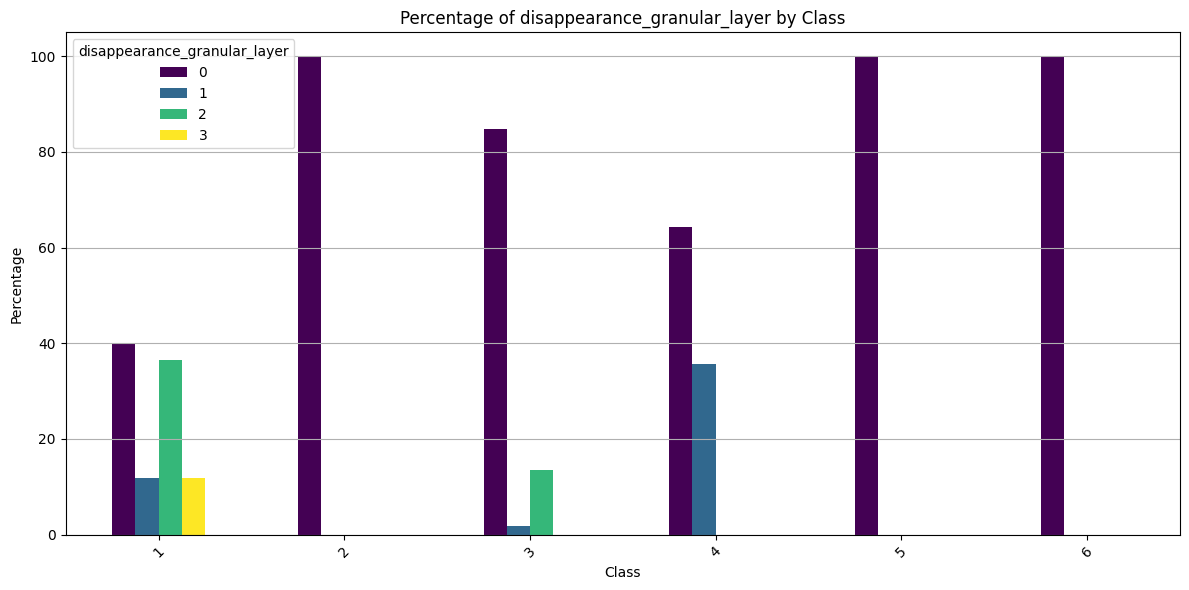

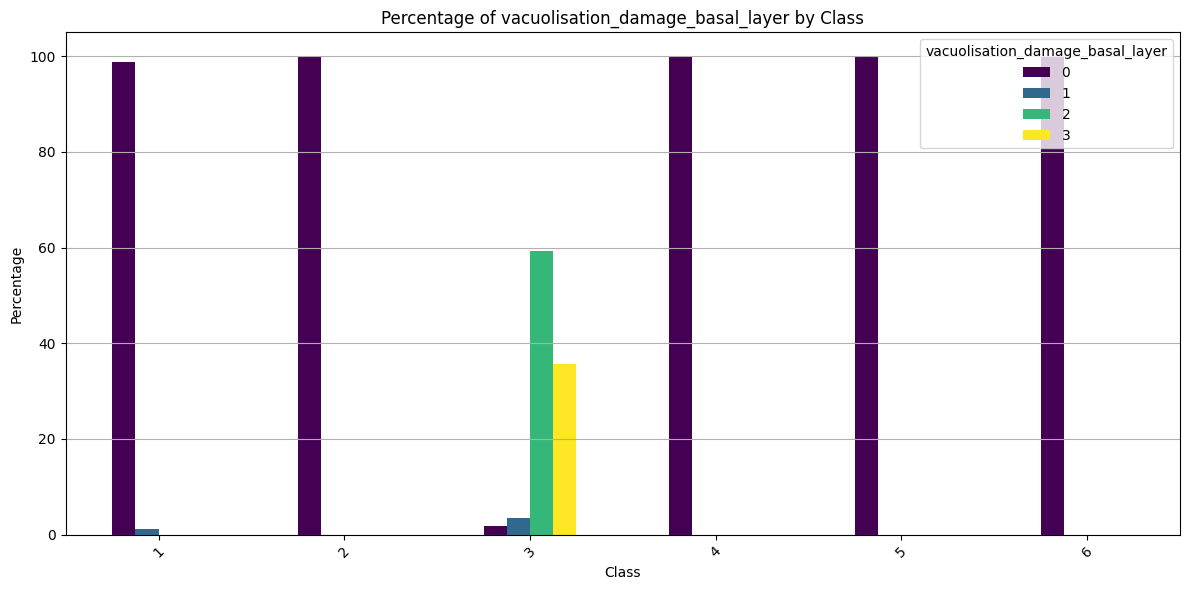

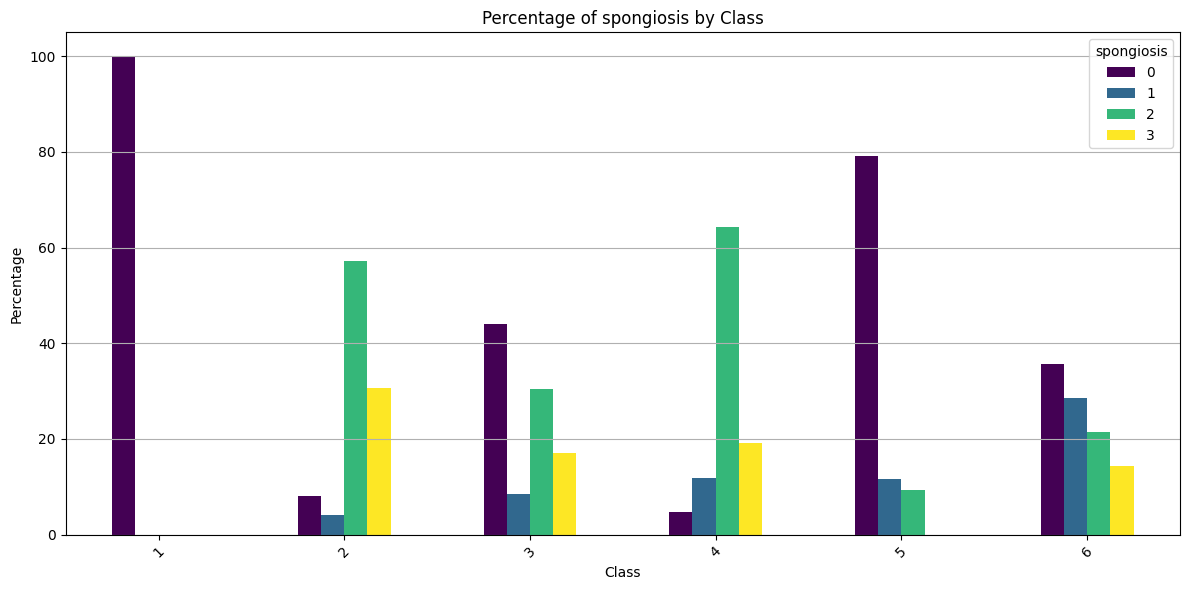

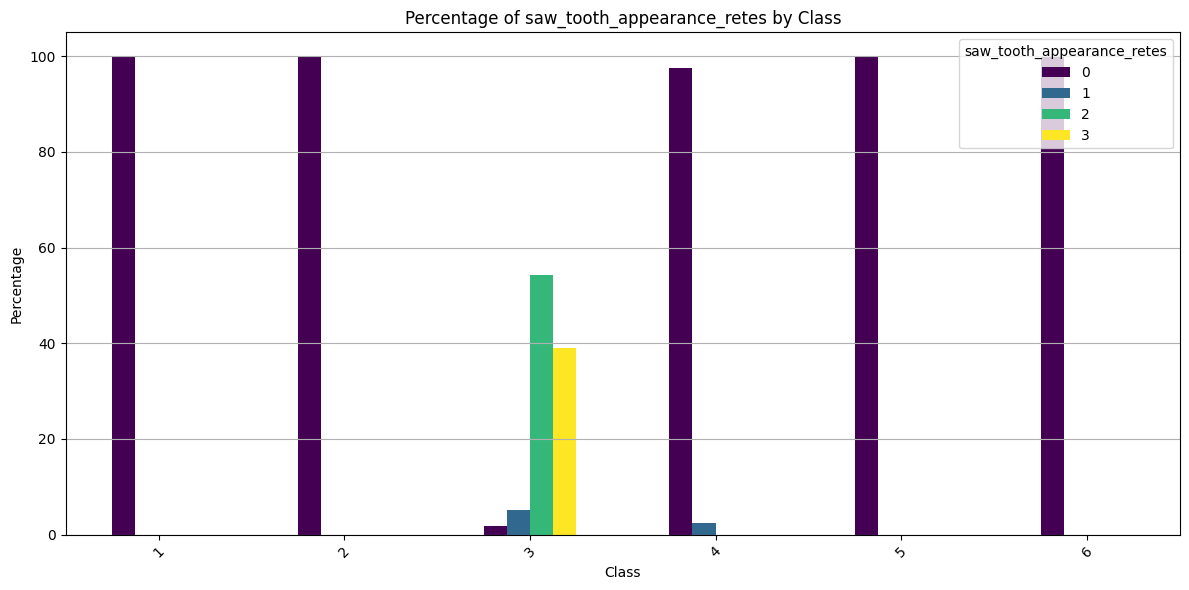

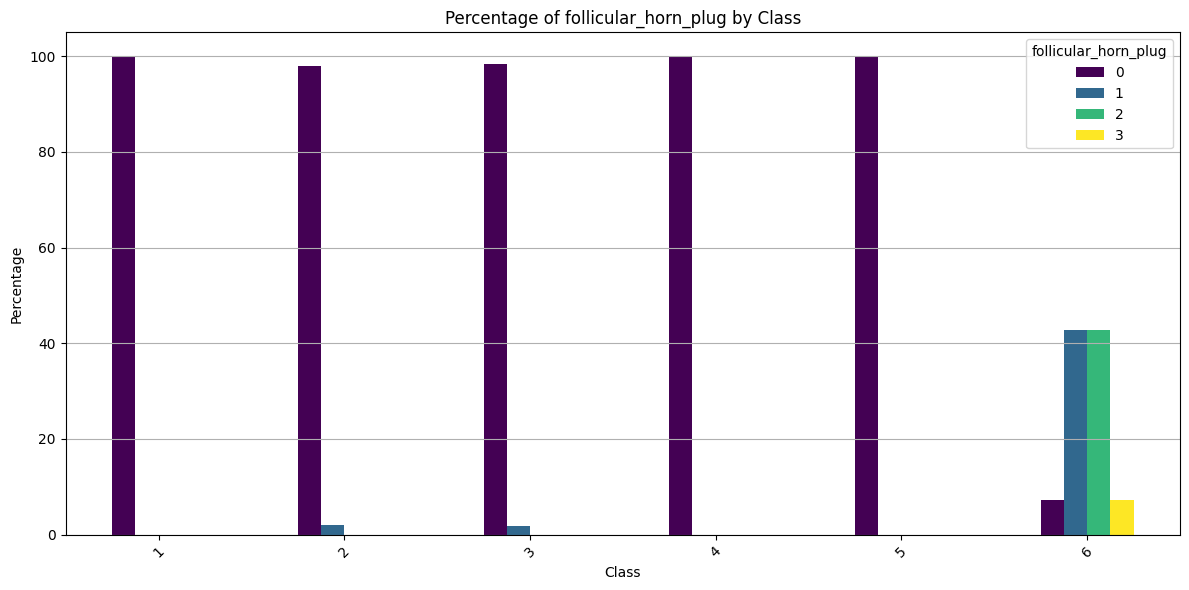

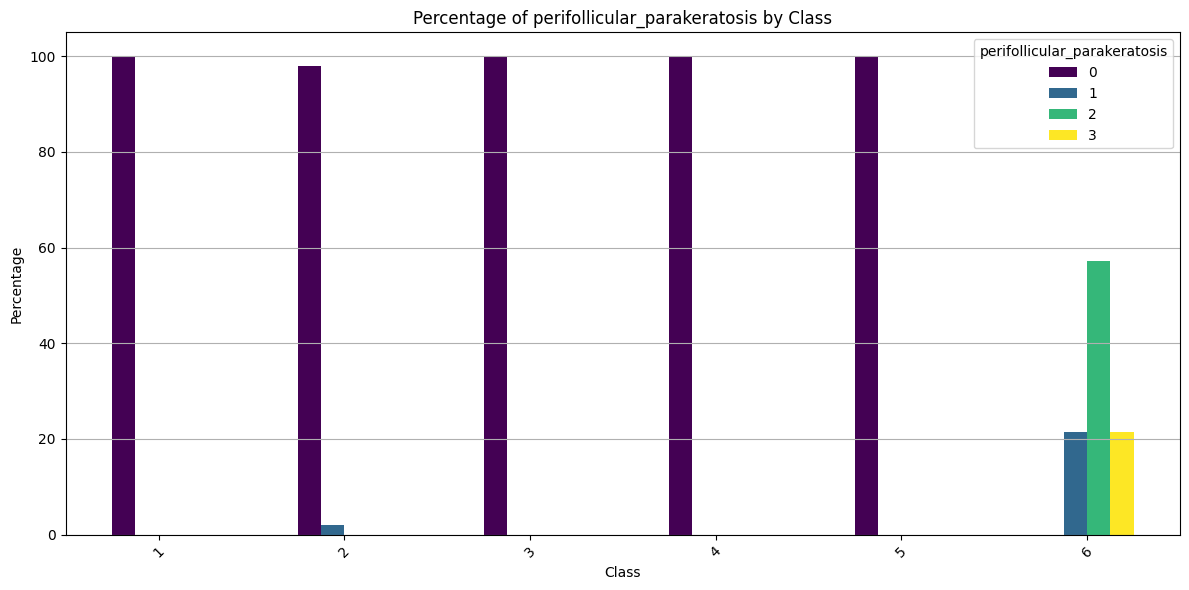

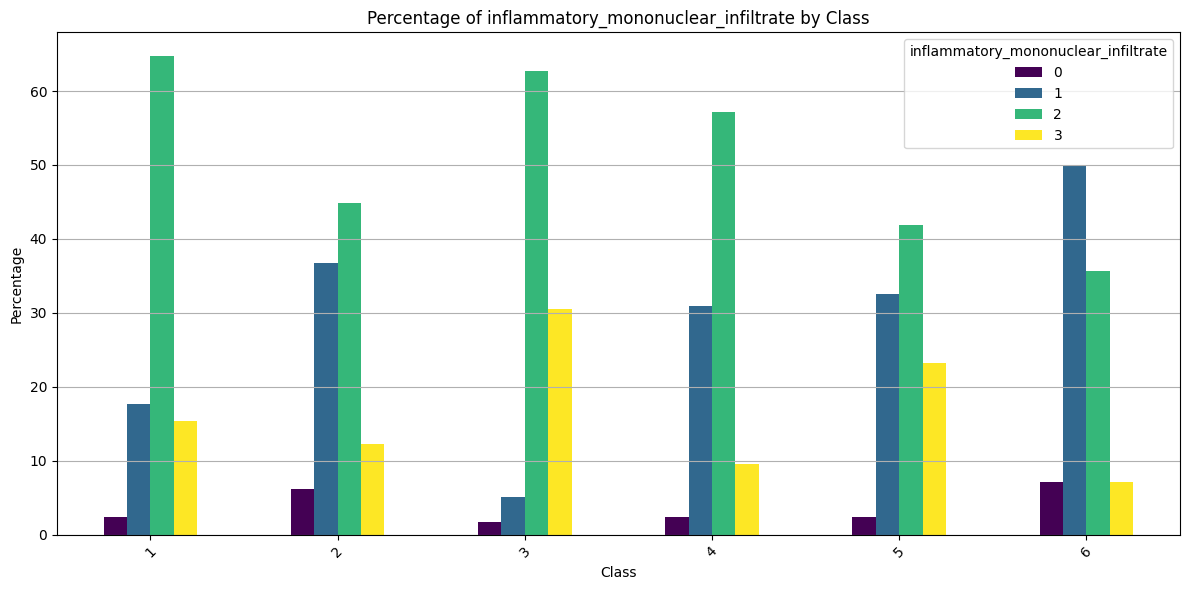

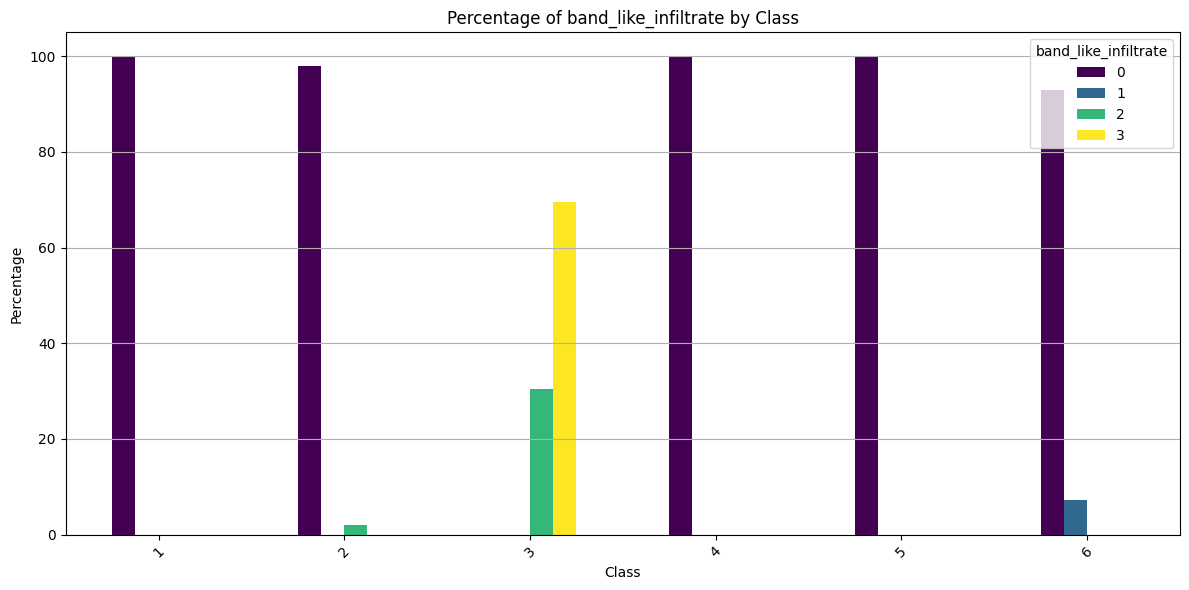

In [ ]:
# Combine X_train and y_train for easier grouping
combined_df = X_train.copy()
combined_df['class'] = y_train

# List of categorical features to plot, excluding 'age'
categorical_features = [col for col in X_train.columns if col != 'age']

# Plotting separate clustered bar charts for each categorical feature
for feature in categorical_features:
    # Calculate the percentage of each category within the groups defined by 'class'
    crosstab = pd.crosstab(combined_df['class'], combined_df[feature])
    crosstab_percentage = crosstab.div(crosstab.sum(axis=1), axis=0) * 100  # Normalize by rows

    # Plot the clustered bar chart
    ax = crosstab_percentage.plot(kind='bar', figsize=(12, 6), colormap='viridis')
    plt.xlabel('Class')
    plt.ylabel('Percentage')
    plt.title(f'Percentage of {feature} by Class')
    plt.xticks(rotation=45)
    plt.legend(title=feature)
    plt.grid(axis='y')

    # Display the plot
    plt.tight_layout()
    plt.show()

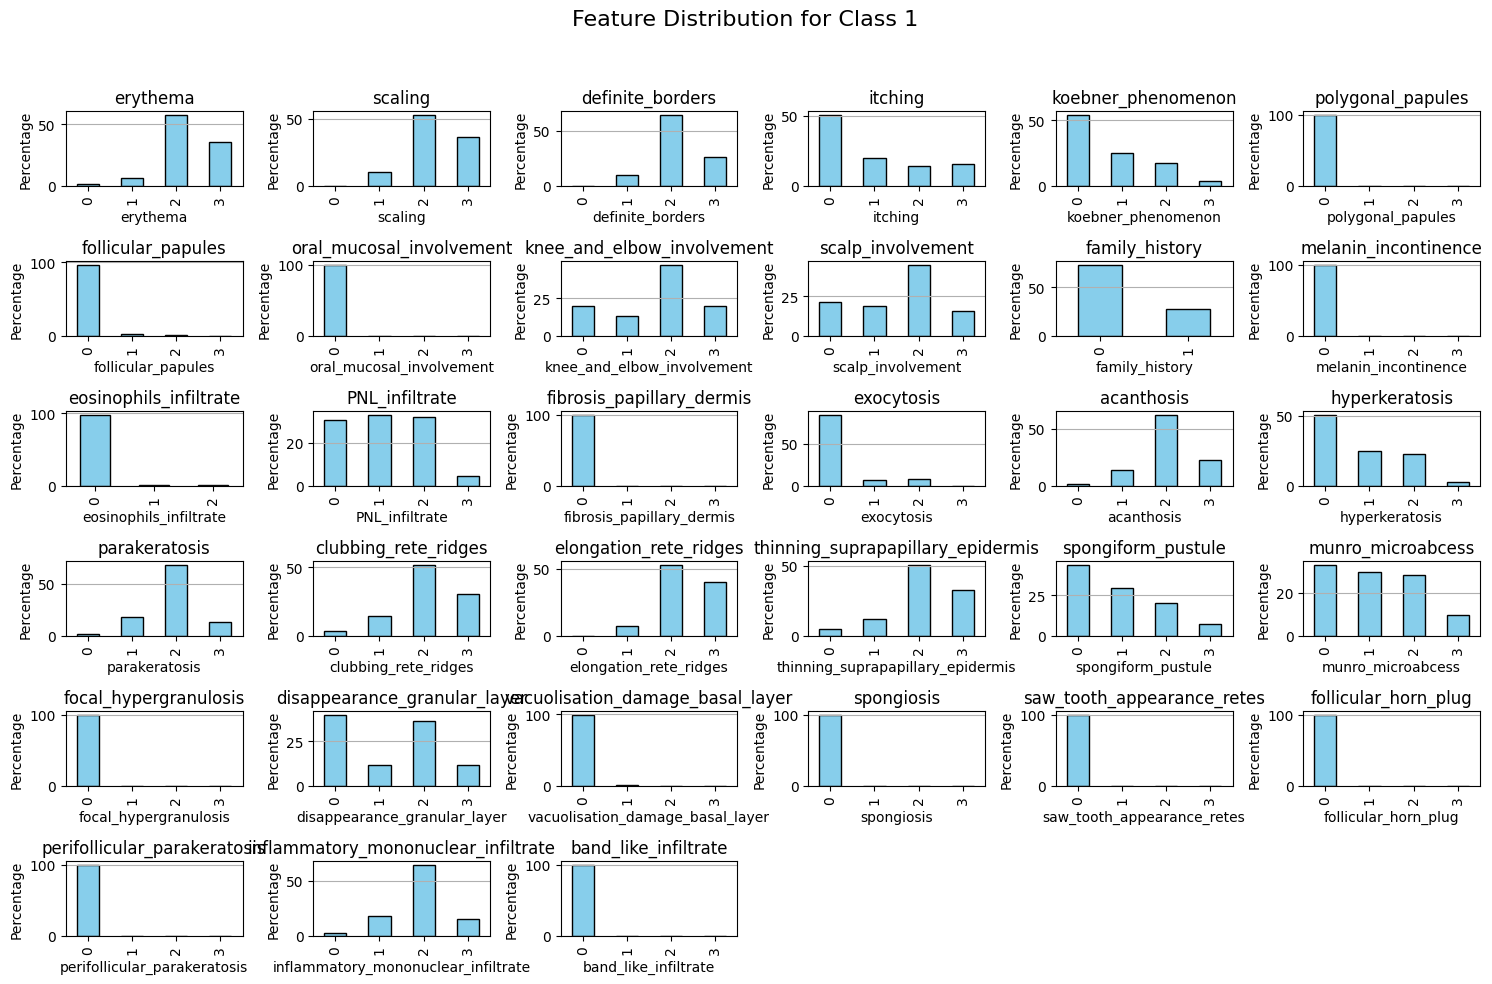

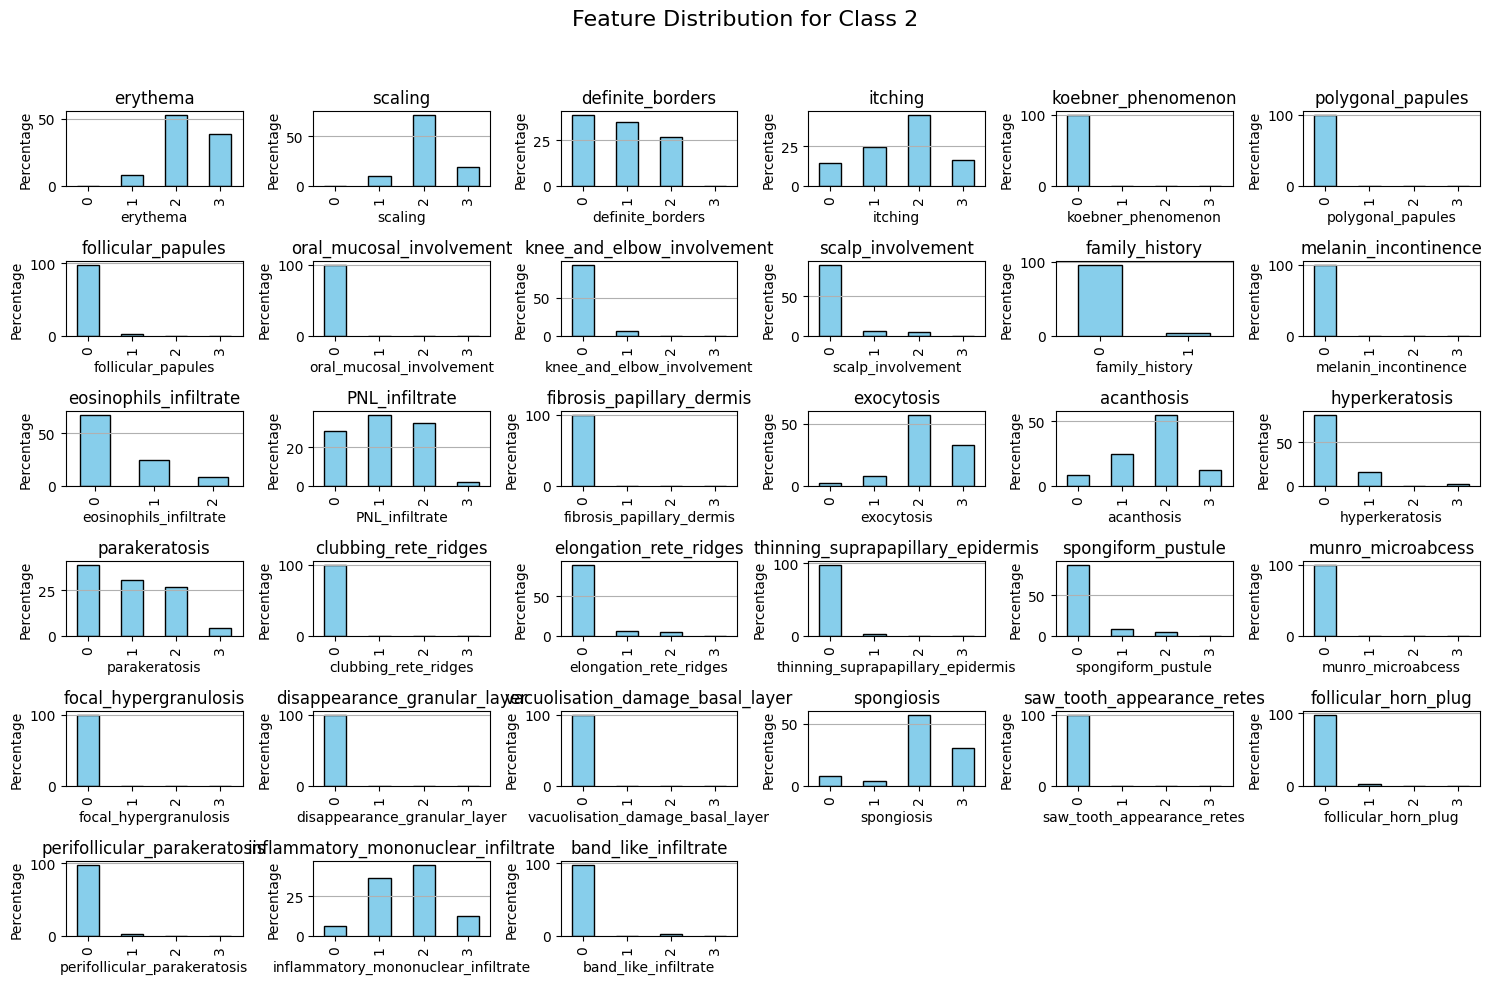

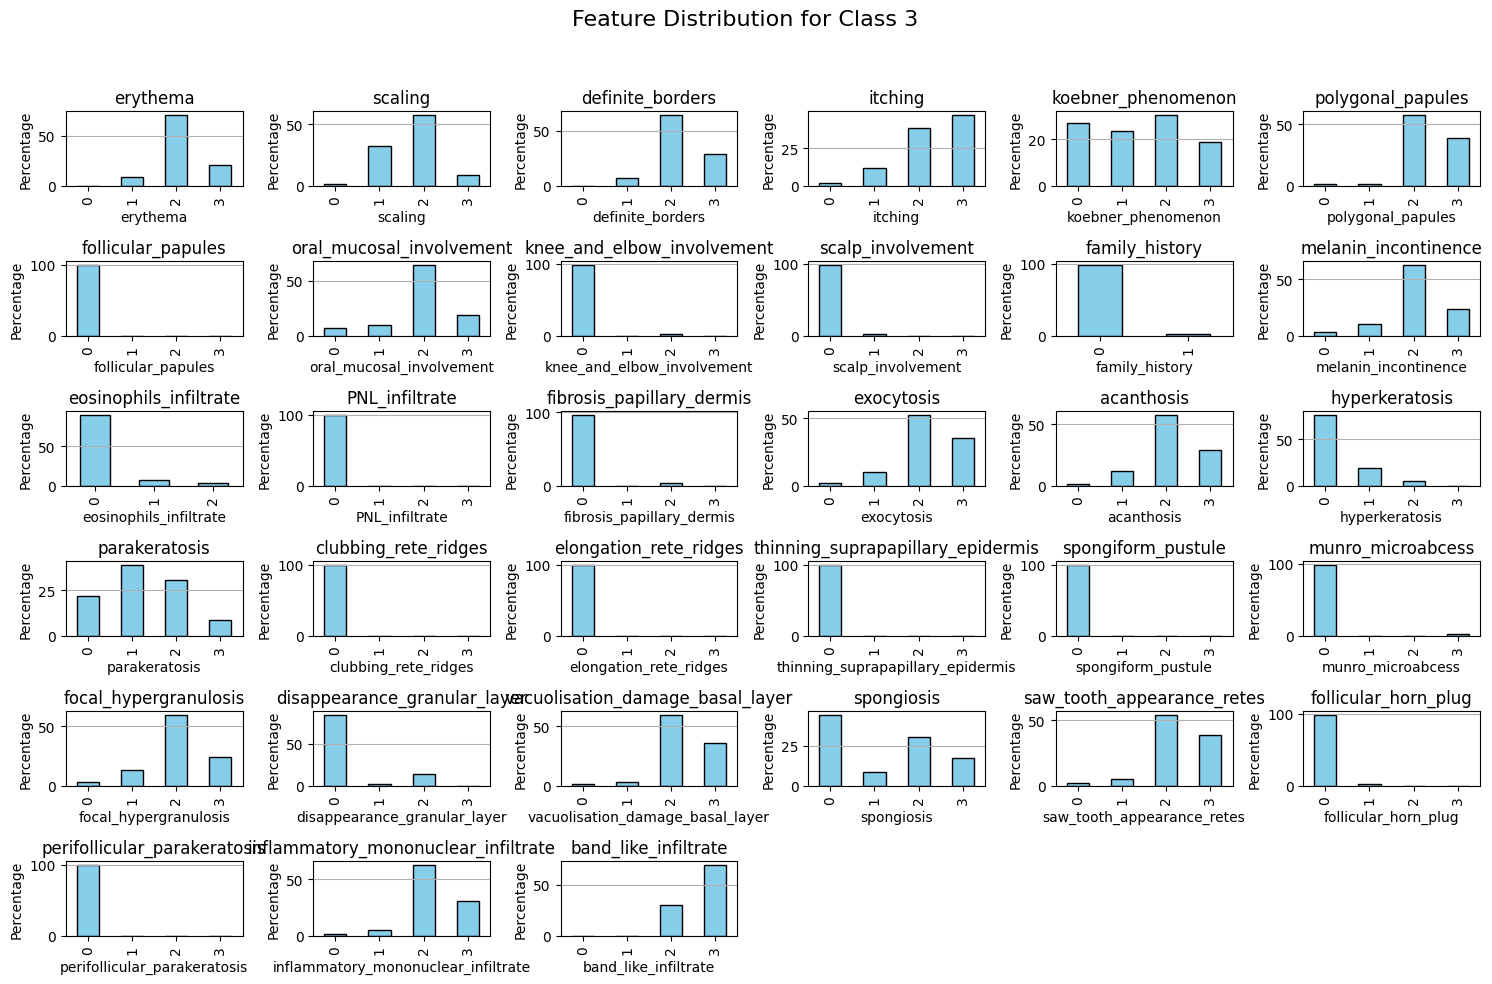

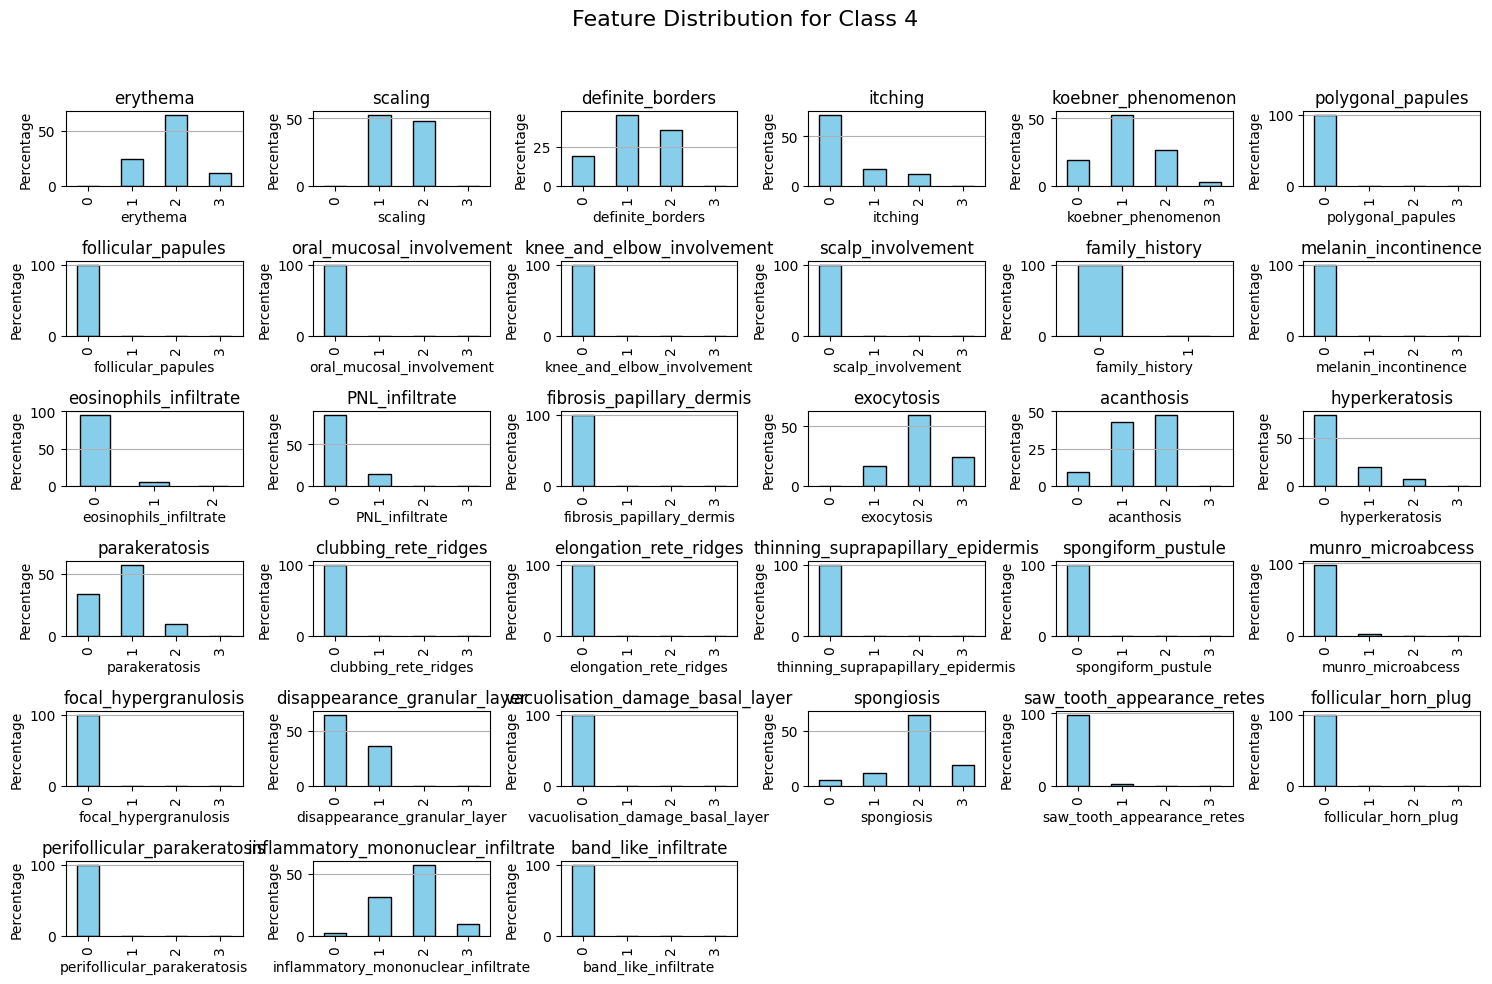

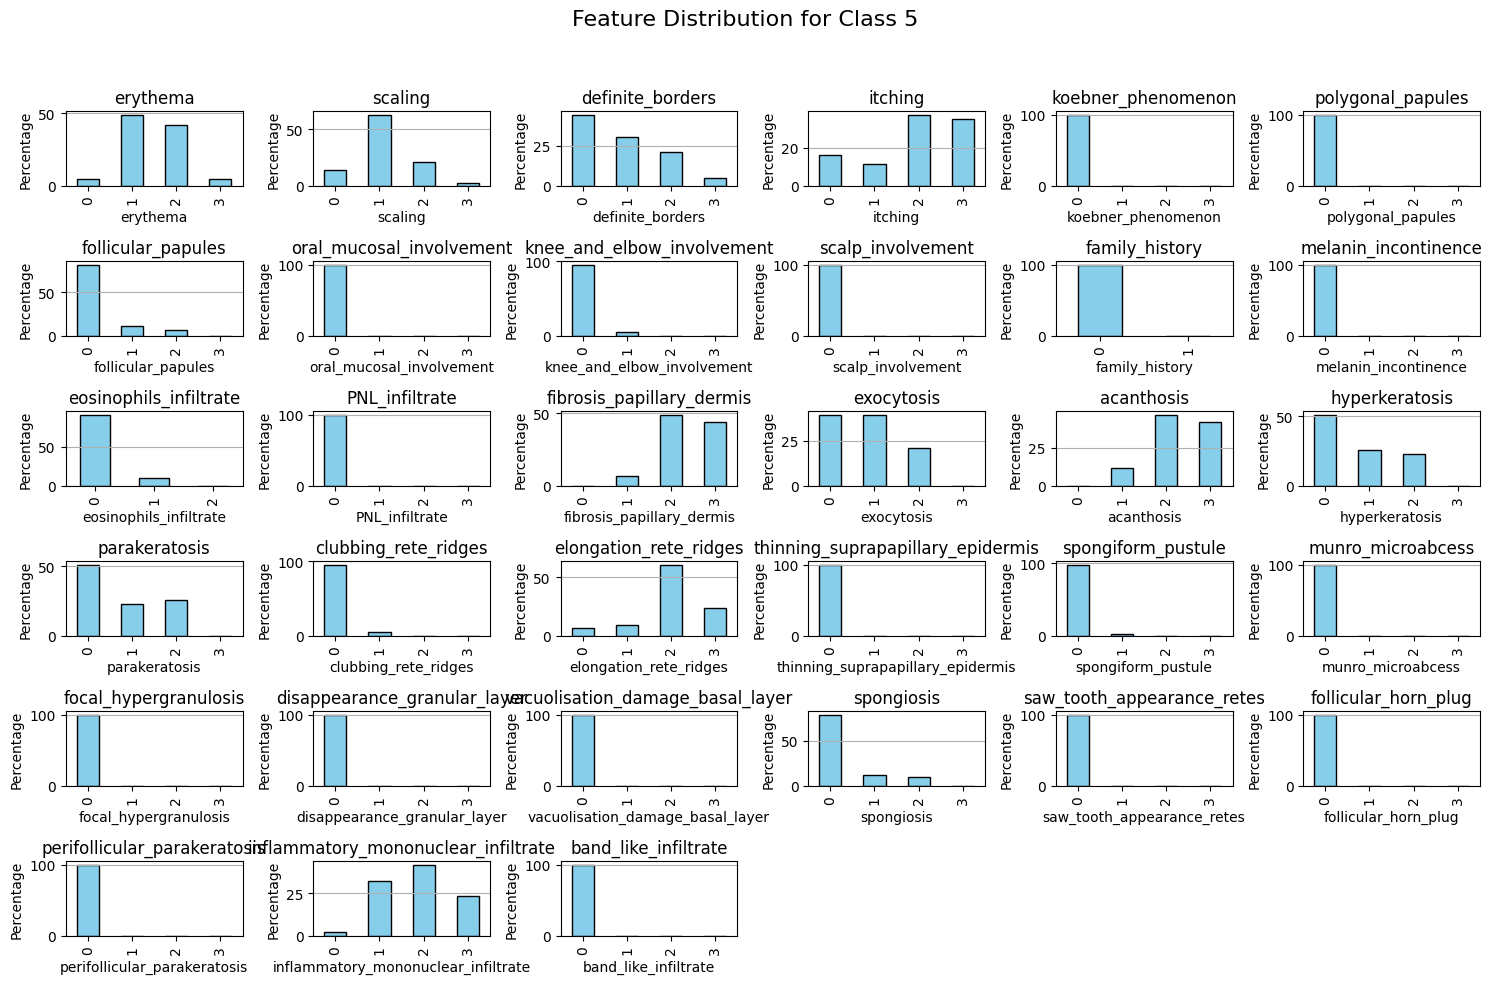

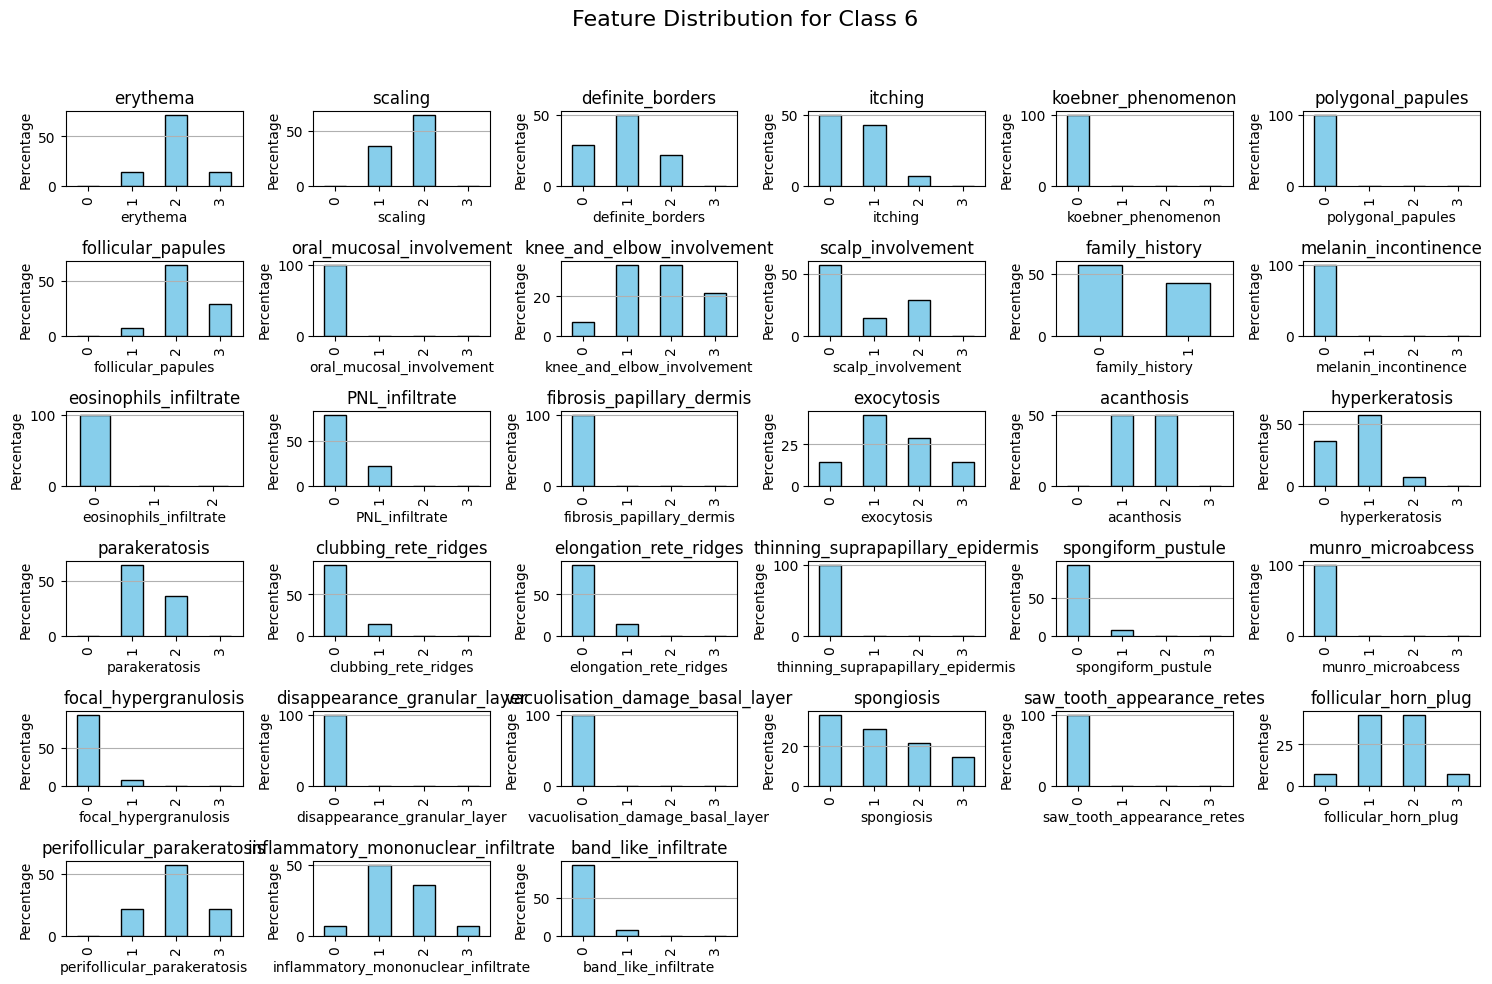

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Combine X_train and y_train for easier grouping
combined_df = X_train.copy()
combined_df['class'] = y_train

# List of categorical features to plot, excluding 'age'
categorical_features = [col for col in X_train.columns if col != 'age']

# Group data by 'class'
grouped = combined_df.groupby('class')

# Plotting feature distributions for each class
for class_label, group in grouped:
    plt.figure(figsize=(15, 10))
    plt.suptitle(f'Feature Distribution for Class {class_label}', fontsize=16)

    for i, feature in enumerate(categorical_features):
        plt.subplot(6, 6, i + 1)  # Adjust the grid size (6x6) based on the number of features
        feature_counts = group[feature].value_counts(normalize=True) * 100  # Normalize by the class count
        feature_counts.sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title(feature)
        plt.ylabel('Percentage')
        plt.xlabel(feature)
        plt.grid(axis='y')

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the title
    plt.show()

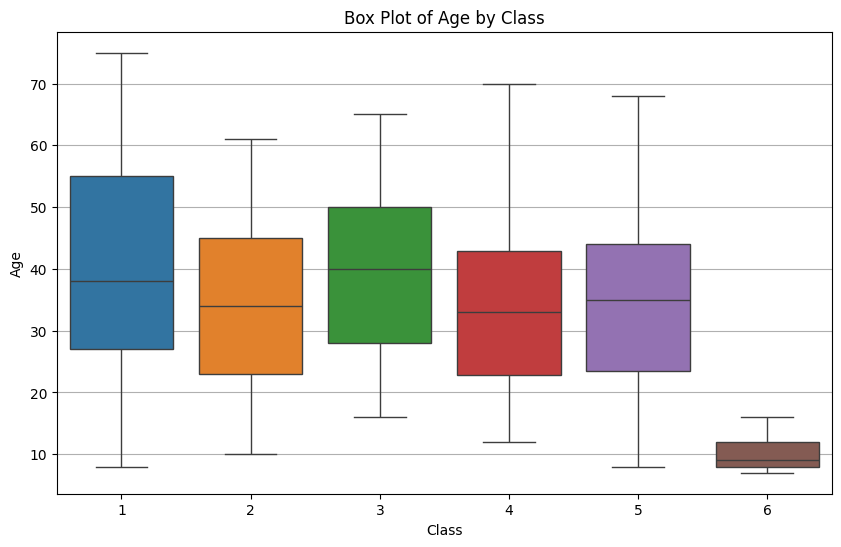

In [ ]:
# Combine X_train and y_train into a single DataFrame
combined_df = X_train.copy()
combined_df['class'] = y_train

# Define color mapping with integers
color_mapping = {
    '1': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
    '2': (1.0, 0.4980392156862745, 0.054901960784313725),
    '3': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
    '4': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
    '5': (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
    '6': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354)
}

# Create the box plot with the consistent color mapping
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='age', data=combined_df, palette=color_mapping)
plt.xlabel('Class')
plt.ylabel('Age')
plt.title('Box Plot of Age by Class')
plt.grid(axis='y')
plt.show()

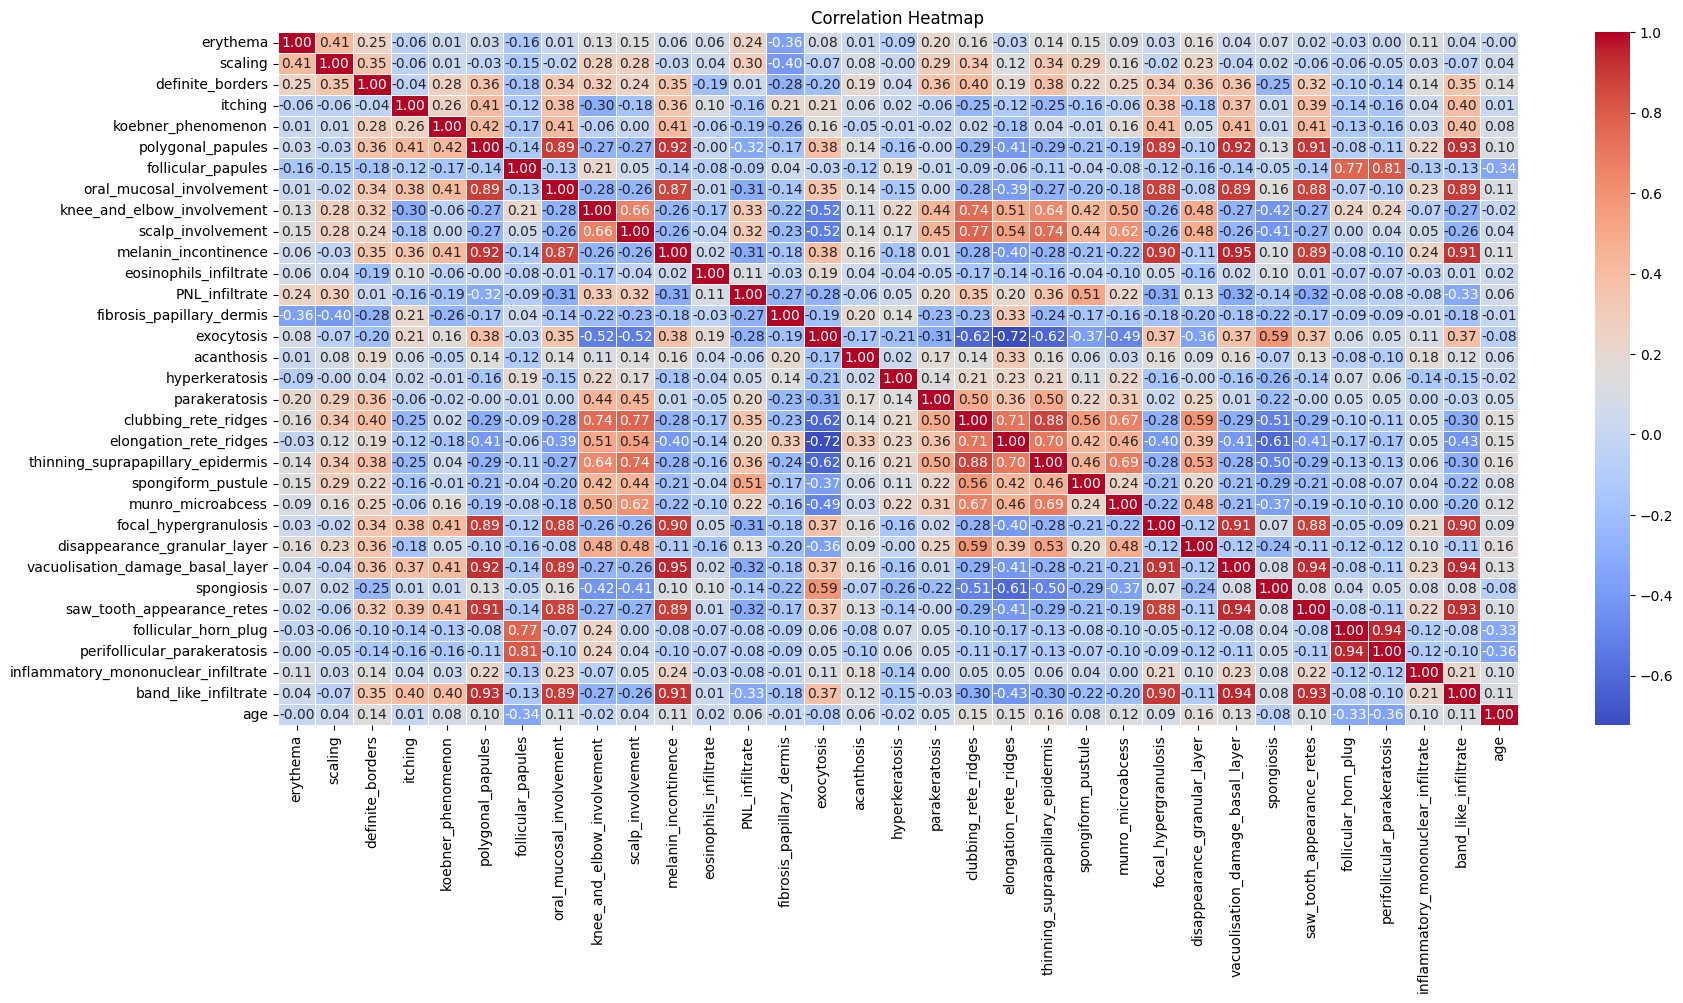

In [ ]:
# Convert ordinal features to numeric
ordinal_features = X_train.columns.difference(['family_history'])
X_train[ordinal_features] = X_train[ordinal_features].apply(pd.to_numeric)

X_train_numeric = X_train.drop(columns=['family_history'])
correlation_matrix = X_train_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(20, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Convert ordinal features to numeric
ordinal_features = X_train.columns.difference(['family_history'])
X_train[ordinal_features] = X_train[ordinal_features].apply(pd.to_numeric)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print(vif_data)

                                feature        VIF
0                              erythema  14.067558
1                               scaling  11.735859
2                      definite_borders   8.557042
3                               itching   4.108989
4                    koebner_phenomenon   2.375712
5                     polygonal_papules  13.601377
6                    follicular_papules   3.604680
7              oral_mucosal_involvement   8.896785
8            knee_and_elbow_involvement   4.780838
9                     scalp_involvement   4.359816
10                       family_history   1.415419
11                 melanin_incontinence  16.026445
12               eosinophils_infiltrate   1.340970
13                       PNL_infiltrate   2.816668
14            fibrosis_papillary_dermis   4.061172
15                           exocytosis   6.972092
16                           acanthosis  11.202278
17                       hyperkeratosis   1.868084
18                        parak

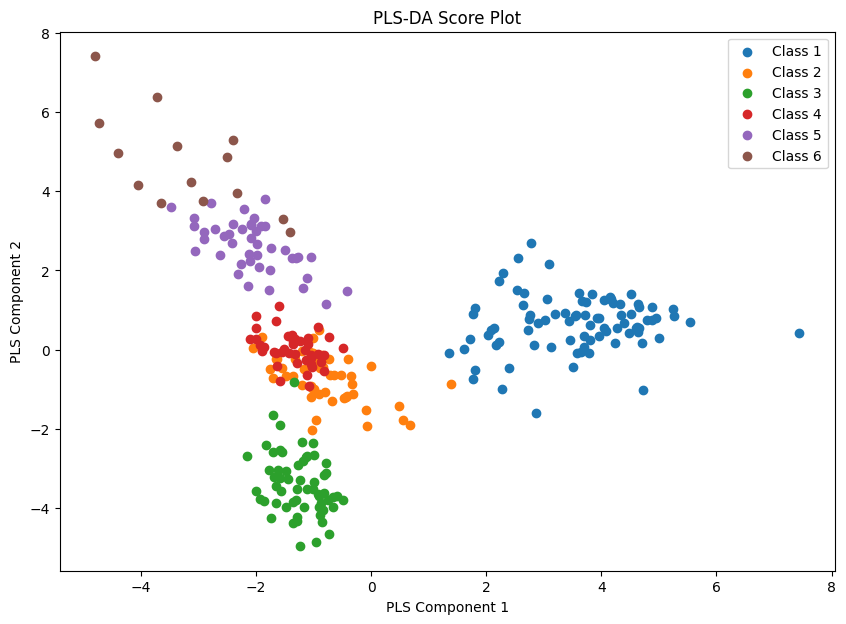

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Assuming your data is already split into X_train, X_test, y_train, y_test

# Create a StandardScaler instance
scaler = StandardScaler()

# Scale the features and apply PLS-DA with 2 components
pls = PLSRegression(n_components=2)
pls_da = make_pipeline(scaler, pls)

# Fit the PLS-DA model
pls_da.fit(X_train, y_train)

# Get the PLS-DA model from the pipeline
pls_model = pls_da.named_steps['plsregression']

# Get the PLS-DA scores (projections) for the training data
X_train_scores = pls_model.x_scores_

# Plot the PLS-DA scores (class separation)
plt.figure(figsize=(10, 7))
for class_value in np.unique(y_train):
    plt.scatter(X_train_scores[y_train == class_value, 0],
                X_train_scores[y_train == class_value, 1],
                label=f'Class {class_value}')
plt.xlabel('PLS Component 1')
plt.ylabel('PLS Component 2')
plt.title('PLS-DA Score Plot')
plt.legend()
plt.show()




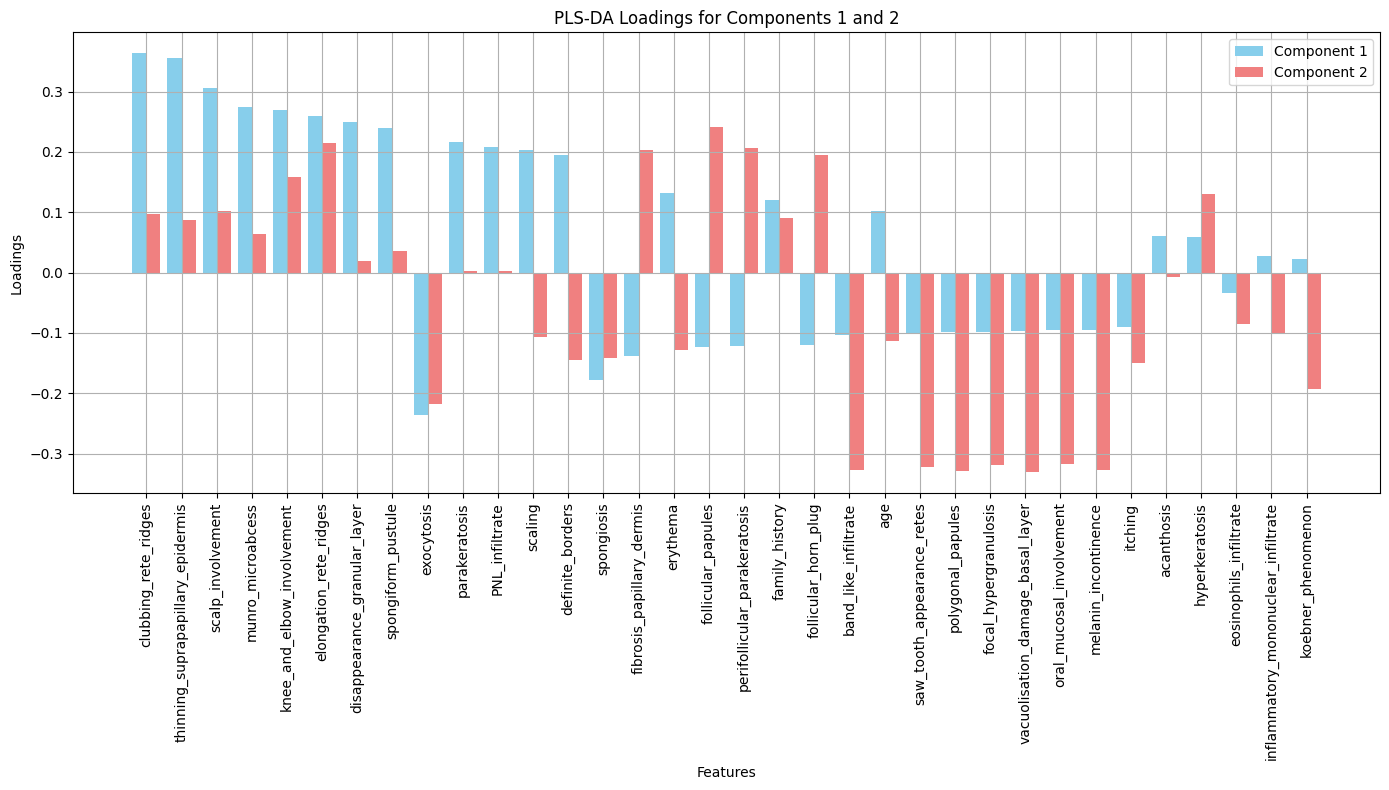

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Fit the PLS-DA model with 2 components
pls = PLSRegression(n_components=2)
pls.fit(X_train_scaled, y_train)

# Get the loadings for both PLS components
loadings_component_1 = pls.x_loadings_[:, 0]
loadings_component_2 = pls.x_loadings_[:, 1]

# Create a DataFrame for the loadings with feature names
loadings_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Loading_Component_1': loadings_component_1,
    'Loading_Component_2': loadings_component_2
})

# Sort the DataFrame by the absolute values of loadings for component 1 (optional)
loadings_df = loadings_df.reindex(loadings_df['Loading_Component_1'].abs().sort_values(ascending=False).index)

# Plot the loadings as a clustered bar chart
plt.figure(figsize=(14, 8))
bar_width = 0.4
index = np.arange(len(loadings_df))

plt.bar(index, loadings_df['Loading_Component_1'], bar_width, label='Component 1', color='skyblue')
plt.bar(index + bar_width, loadings_df['Loading_Component_2'], bar_width, label='Component 2', color='lightcoral')

plt.xlabel('Features')
plt.ylabel('Loadings')
plt.title('PLS-DA Loadings for Components 1 and 2')
plt.xticks(index + bar_width / 2, loadings_df['Feature'], rotation=90)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()



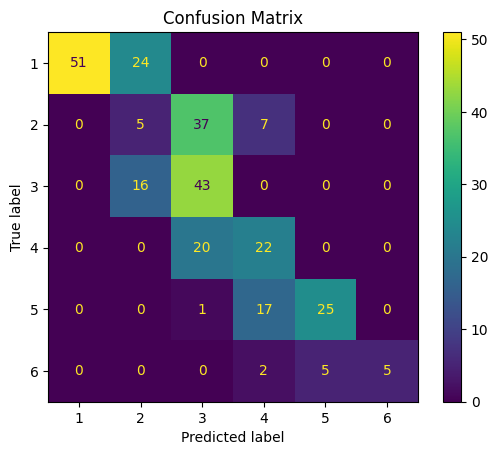

In [ ]:
# Make predictions
y_train_pred = pls_da.predict(X_train)

# Convert continuous predictions to class labels (if needed)
# Assuming you have class labels from your model training
# If y_train_pred is continuous, you might need to map it to your class labels.
y_train_pred_labels = np.argmax(y_train_pred, axis=1) if y_train_pred.ndim > 1 else np.round(y_train_pred).astype(int)

# Now, compute confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_train, y_train_pred_labels, labels=np.unique(y_train))

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_train))
disp.plot(cmap='viridis')
plt.title('Confusion Matrix')
plt.show()


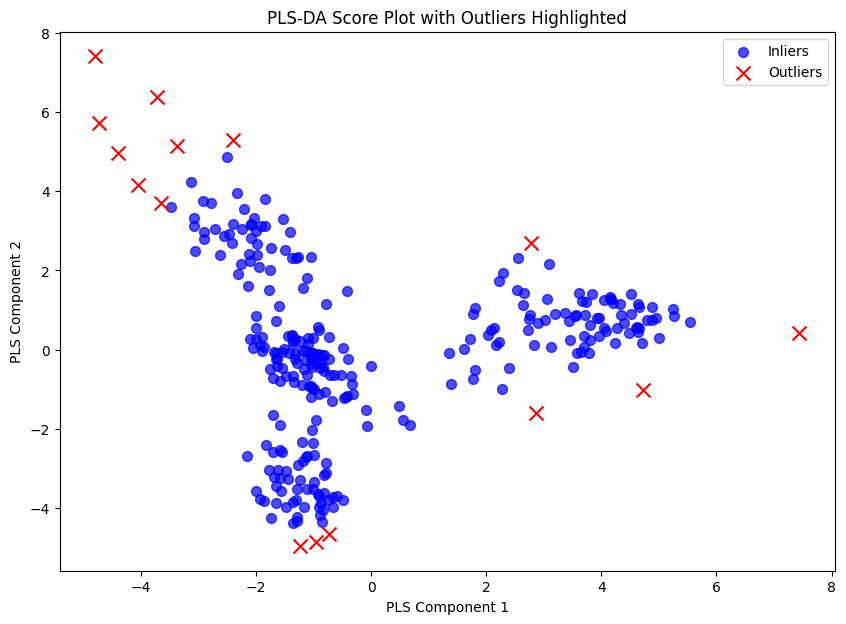

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Assuming your data is already split into X_train, X_test, y_train, y_test

# Create a StandardScaler instance
scaler = StandardScaler()

# Scale the features and apply PLS-DA with 2 components
pls = PLSRegression(n_components=2)
pls_da = make_pipeline(scaler, pls)

# Fit the PLS-DA model
pls_da.fit(X_train, y_train)

# Get the PLS-DA model from the pipeline
pls_model = pls_da.named_steps['plsregression']

# Get the PLS-DA scores (projections) for the training data
X_train_scores = pls_model.x_scores_

# Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.05)  # Adjust contamination as needed
iso_forest.fit(X_train_scores)
outliers = iso_forest.predict(X_train_scores)  # -1 for outliers, 1 for inliers

# Identify outlier indices
outlier_indices = np.where(outliers == -1)[0]

# Plot the PLS-DA scores with outliers highlighted
plt.figure(figsize=(10, 7))

# Plot inliers
plt.scatter(X_train_scores[outliers == 1, 0], X_train_scores[outliers == 1, 1], c='blue', label='Inliers', alpha=0.7, s=50)

# Plot outliers with different color and marker style
plt.scatter(X_train_scores[outlier_indices, 0], X_train_scores[outlier_indices, 1], color='red', marker='x', label='Outliers', edgecolor='k', s=100)

plt.xlabel('PLS Component 1')
plt.ylabel('PLS Component 2')
plt.title('PLS-DA Score Plot with Outliers Highlighted')
plt.legend()
plt.show()


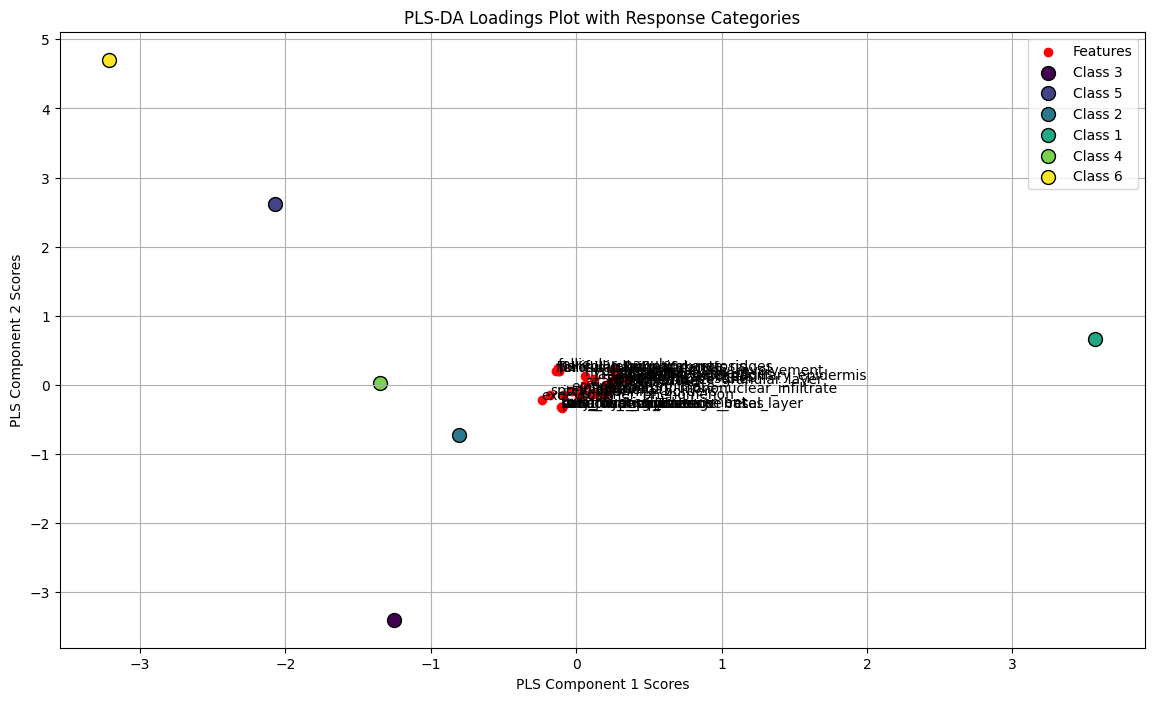

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Fit the PLS-DA model with 2 components
pls = PLSRegression(n_components=2)
pls.fit(X_train_scaled, y_train)

# Get the PLS component scores for training data
X_train_pls_scores = pls.transform(X_train_scaled)

# Get the loadings for both PLS components
loadings_component_1 = pls.x_loadings_[:, 0]
loadings_component_2 = pls.x_loadings_[:, 1]

# Combine loadings into a DataFrame
loadings_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Loading_Component_1': loadings_component_1,
    'Loading_Component_2': loadings_component_2
})

# Calculate mean positions for each category based on PLS scores
y_train_unique = y_train.unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(y_train_unique)))

# Plotting the loadings
plt.figure(figsize=(14, 8))
plt.scatter(loadings_component_1, loadings_component_2, color='red', label='Features')

# Annotate the features
for i, feature in enumerate(X_train.columns):
    plt.text(loadings_component_1[i], loadings_component_2[i], feature, fontsize=10)

# Plot the response variable categories based on PLS scores
for i, cat in enumerate(y_train_unique):
    # Get indices for the current category
    indices = np.where(y_train == cat)[0]
    # Calculate the mean position of the PLS scores for this category
    mean_pos_1 = np.mean(X_train_pls_scores[indices, 0])
    mean_pos_2 = np.mean(X_train_pls_scores[indices, 1])
    plt.scatter(mean_pos_1, mean_pos_2, color=colors[i], label=f'Class {cat}', s=100, edgecolor='k')

plt.xlabel('PLS Component 1 Scores')
plt.ylabel('PLS Component 2 Scores')
plt.title('PLS-DA Loadings Plot with Response Categories')
plt.legend()
plt.grid(True)
plt.show()




In [ ]:
import numpy as np
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Fit the PLS-DA model with 2 components
pls = PLSRegression(n_components=2)
pls.fit(X_train_scaled, y_train)

# Calculate the variance explained by each component
# Note: PLSRegression doesn't provide explained variance directly,
# but you can calculate it using the proportion of variance explained by the components.

# Get the PLS component scores
X_train_pls_scores = pls.transform(X_train_scaled)

# Calculate the variance explained by each component
total_variance = np.var(X_train_scaled, axis=0).sum()
explained_variance = np.var(X_train_pls_scores, axis=0).sum()

variance_explained_ratio = explained_variance / total_variance

# Print the results
print("Variance explained by each PLS component:")
for i in range(pls.n_components):
    component_variance = np.var(X_train_pls_scores[:, i])
    ratio = component_variance / np.var(X_train_scaled, axis=0).sum()
    print(f"Component {i+1}: {ratio:.4f} ({component_variance:.4f})")

# Overall explained variance ratio by the 2 components
print(f"Total variance explained by the 2 components: {variance_explained_ratio:.4f}")


Variance explained by each PLS component:
Component 1: 0.1799 (6.1157)
Component 2: 0.1501 (5.1027)
Total variance explained by the 2 components: 0.3300


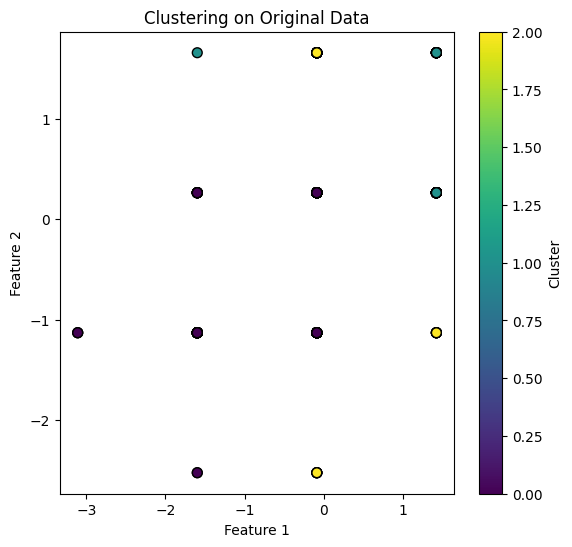

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Assuming X_train is a DataFrame with original features (and 'family_history' has been dropped if necessary)
# Standardize the features
X_train_filtered = X_train.drop(columns=['family_history'])
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_filtered)

# Perform k-means clustering on the original features (assume 3 clusters for example)
kmeans_original = KMeans(n_clusters=3, random_state=42)
clusters_original = kmeans_original.fit_predict(X_train_scaled)

# Plot the clustering results
plt.figure(figsize=(14, 6))

# Plot for original data
plt.subplot(1, 2, 1)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=clusters_original, cmap='viridis', s=50, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustering on Original Data')
plt.colorbar(label='Cluster')

